In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/kc_house_data.csv")
#df=pd.read_csv("kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [ ]:
print(df['id'].nunique())

21436


In [ ]:
df[df['id'].duplicated()]['id']

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20181    7853400250
20613    2724049222
20670    8564860270
20780    6300000226
21581    7853420110
Name: id, Length: 177, dtype: int64

In [ ]:
df['id'].value_counts()

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64

In [ ]:
df[df['id'] == 795000620]

id             date     price  bedrooms  bathrooms  sqft_living  \
17602  795000620  20140924T000000  115000.0         3        1.0         1080   
17603  795000620  20141215T000000  124000.0         3        1.0         1080   
17604  795000620  20150311T000000  157000.0         3        1.0         1080   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
17602      6250     1.0           0     0  ...      5        1080   
17603      6250     1.0           0     0  ...      5        1080   
17604      6250     1.0           0     0  ...      5        1080   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
17602              0      1950             0    98168  47.5045 -122.33   
17603              0      1950             0    98168  47.5045 -122.33   
17604              0      1950             0    98168  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17602           1070        6250  
17603           1070        6250  
17604           1070        6250  

[3 rows x 21 columns]

In [ ]:
df = df[df['date'] != '20141215T000000']

In [ ]:
duplicate_ids = df[df['id'].duplicated()]['id']
duplicate_data = df[df['id'].isin(duplicate_ids)]
duplicate_data.to_csv('duplicates.csv', index=False)

In [ ]:
df1 = pd.read_csv('duplicates.csv')

In [ ]:
idx = df1.groupby('id')['price'].transform(max) == df1['price']

In [ ]:
df_max_price = df1[idx]

In [ ]:
df_unique_ids = df1.drop_duplicates(subset=['id'])

In [ ]:
df_final = pd.merge(df_unique_ids, df_max_price[['id', 'date', 'price']], on='id', suffixes=('', '_max'))

In [ ]:
df_final.to_csv('duplicates.csv', index=False)

In [ ]:
df1= pd.read_csv('duplicates.csv')
df1

id             date      price  bedrooms  bathrooms  sqft_living  \
0    6021501535  20140725T000000   430000.0         3       1.50         1580   
1    4139480200  20140618T000000  1384000.0         4       3.25         4290   
2    7520000520  20140905T000000   232000.0         2       1.00         1240   
3    3969300030  20140723T000000   165000.0         4       1.00         1000   
4    2231500030  20141001T000000   315000.0         4       2.25         2180   
..          ...              ...        ...       ...        ...          ...   
173  7853400250  20140604T000000   610000.0         4       3.50         2910   
174  2724049222  20140802T000000   163800.0         2       2.50         1000   
175  8564860270  20140708T000000   449990.0         4       2.50         2680   
176  6300000226  20140626T000000   240000.0         4       1.00         1200   
177  7853420110  20141003T000000   594866.0         3       3.00         2780   

     sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0        5000     1.0           0     0  ...            290      1939   
1       12103     1.0           0     3  ...           1600      1997   
2       12092     1.0           0     0  ...            280      1922   
3        7134     1.0           0     0  ...              0      1943   
4       10754     1.0           0     0  ...           1080      1954   
..        ...     ...         ...   ...  ...            ...       ...   
173      5260     2.0           0     0  ...              0      2012   
174      1092     2.0           0     0  ...             10      2004   
175      5539     2.0           0     0  ...              0      2013   
176      2171     1.5           0     0  ...              0      1933   
177      6000     2.0           0     0  ...              0      2013   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0    98117  47.6870 -122.386           1570        4500   
1               0    98006  47.5503 -122.102           3860       11244   
2            1984    98146  47.4957 -122.352           1820        7460   
3               0    98178  47.4897 -122.240           1020        7138   
4               0    98133  47.7711 -122.341           1810        6929   
..            ...      ...      ...      ...            ...         ...   
173             0    98065  47.5168 -121.883           2910        5260   
174             0    98118  47.5419 -122.271           1330        1466   
175             0    98045  47.4759 -121.734           2680        5992   
176             0    98133  47.7076 -122.342           1130        1598   
177             0    98065  47.5184 -121.886           2850        6000   

            date_max  price_max  
0    20141223T000000   700000.0  
1    20141209T000000  1400000.0  
2    20150311T000000   240500.0  
3    20141229T000000   239900.0  
4    20150324T000000   530000.0  
..               ...        ...  
173  20150219T000000   645000.0  
174  20141201T000000   220000.0  
175  20150330T000000   502000.0  
176  20150504T000000   380000.0  
177  20150504T000000   625000.0  

[178 rows x 23 columns]

In [ ]:
df1= df1.rename(columns= {'date': 'valuation_date1'})
df1

id  valuation_date1      price  bedrooms  bathrooms  sqft_living  \
0    6021501535  20140725T000000   430000.0         3       1.50         1580   
1    4139480200  20140618T000000  1384000.0         4       3.25         4290   
2    7520000520  20140905T000000   232000.0         2       1.00         1240   
3    3969300030  20140723T000000   165000.0         4       1.00         1000   
4    2231500030  20141001T000000   315000.0         4       2.25         2180   
..          ...              ...        ...       ...        ...          ...   
173  7853400250  20140604T000000   610000.0         4       3.50         2910   
174  2724049222  20140802T000000   163800.0         2       2.50         1000   
175  8564860270  20140708T000000   449990.0         4       2.50         2680   
176  6300000226  20140626T000000   240000.0         4       1.00         1200   
177  7853420110  20141003T000000   594866.0         3       3.00         2780   

     sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0        5000     1.0           0     0  ...            290      1939   
1       12103     1.0           0     3  ...           1600      1997   
2       12092     1.0           0     0  ...            280      1922   
3        7134     1.0           0     0  ...              0      1943   
4       10754     1.0           0     0  ...           1080      1954   
..        ...     ...         ...   ...  ...            ...       ...   
173      5260     2.0           0     0  ...              0      2012   
174      1092     2.0           0     0  ...             10      2004   
175      5539     2.0           0     0  ...              0      2013   
176      2171     1.5           0     0  ...              0      1933   
177      6000     2.0           0     0  ...              0      2013   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0    98117  47.6870 -122.386           1570        4500   
1               0    98006  47.5503 -122.102           3860       11244   
2            1984    98146  47.4957 -122.352           1820        7460   
3               0    98178  47.4897 -122.240           1020        7138   
4               0    98133  47.7711 -122.341           1810        6929   
..            ...      ...      ...      ...            ...         ...   
173             0    98065  47.5168 -121.883           2910        5260   
174             0    98118  47.5419 -122.271           1330        1466   
175             0    98045  47.4759 -121.734           2680        5992   
176             0    98133  47.7076 -122.342           1130        1598   
177             0    98065  47.5184 -121.886           2850        6000   

            date_max  price_max  
0    20141223T000000   700000.0  
1    20141209T000000  1400000.0  
2    20150311T000000   240500.0  
3    20141229T000000   239900.0  
4    20150324T000000   530000.0  
..               ...        ...  
173  20150219T000000   645000.0  
174  20141201T000000   220000.0  
175  20150330T000000   502000.0  
176  20150504T000000   380000.0  
177  20150504T000000   625000.0  

[178 rows x 23 columns]

In [ ]:
df1= df1.rename(columns= {'price': 'valuation1', 'date_max': 'valuation_date2', 'price_max': 'valuation2'})
df1

id  valuation_date1  valuation1  bedrooms  bathrooms  \
0    6021501535  20140725T000000    430000.0         3       1.50   
1    4139480200  20140618T000000   1384000.0         4       3.25   
2    7520000520  20140905T000000    232000.0         2       1.00   
3    3969300030  20140723T000000    165000.0         4       1.00   
4    2231500030  20141001T000000    315000.0         4       2.25   
..          ...              ...         ...       ...        ...   
173  7853400250  20140604T000000    610000.0         4       3.50   
174  2724049222  20140802T000000    163800.0         2       2.50   
175  8564860270  20140708T000000    449990.0         4       2.50   
176  6300000226  20140626T000000    240000.0         4       1.00   
177  7853420110  20141003T000000    594866.0         3       3.00   

     sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
0           1580      5000     1.0           0     0  ...            290   
1           4290     12103     1.0           0     3  ...           1600   
2           1240     12092     1.0           0     0  ...            280   
3           1000      7134     1.0           0     0  ...              0   
4           2180     10754     1.0           0     0  ...           1080   
..           ...       ...     ...         ...   ...  ...            ...   
173         2910      5260     2.0           0     0  ...              0   
174         1000      1092     2.0           0     0  ...             10   
175         2680      5539     2.0           0     0  ...              0   
176         1200      2171     1.5           0     0  ...              0   
177         2780      6000     2.0           0     0  ...              0   

     yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0        1939             0    98117  47.6870 -122.386           1570   
1        1997             0    98006  47.5503 -122.102           3860   
2        1922          1984    98146  47.4957 -122.352           1820   
3        1943             0    98178  47.4897 -122.240           1020   
4        1954             0    98133  47.7711 -122.341           1810   
..        ...           ...      ...      ...      ...            ...   
173      2012             0    98065  47.5168 -121.883           2910   
174      2004             0    98118  47.5419 -122.271           1330   
175      2013             0    98045  47.4759 -121.734           2680   
176      1933             0    98133  47.7076 -122.342           1130   
177      2013             0    98065  47.5184 -121.886           2850   

     sqft_lot15  valuation_date2  valuation2  
0          4500  20141223T000000    700000.0  
1         11244  20141209T000000   1400000.0  
2          7460  20150311T000000    240500.0  
3          7138  20141229T000000    239900.0  
4          6929  20150324T000000    530000.0  
..          ...              ...         ...  
173        5260  20150219T000000    645000.0  
174        1466  20141201T000000    220000.0  
175        5992  20150330T000000    502000.0  
176        1598  20150504T000000    380000.0  
177        6000  20150504T000000    625000.0  

[178 rows x 23 columns]

In [ ]:
df1['valuation_date1']= pd.to_datetime(df1['valuation_date1'])
df1['valuation_date2']= pd.to_datetime(df1['valuation_date2'])
df1

id valuation_date1  valuation1  bedrooms  bathrooms  sqft_living  \
0    6021501535      2014-07-25    430000.0         3       1.50         1580   
1    4139480200      2014-06-18   1384000.0         4       3.25         4290   
2    7520000520      2014-09-05    232000.0         2       1.00         1240   
3    3969300030      2014-07-23    165000.0         4       1.00         1000   
4    2231500030      2014-10-01    315000.0         4       2.25         2180   
..          ...             ...         ...       ...        ...          ...   
173  7853400250      2014-06-04    610000.0         4       3.50         2910   
174  2724049222      2014-08-02    163800.0         2       2.50         1000   
175  8564860270      2014-07-08    449990.0         4       2.50         2680   
176  6300000226      2014-06-26    240000.0         4       1.00         1200   
177  7853420110      2014-10-03    594866.0         3       3.00         2780   

     sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0        5000     1.0           0     0  ...            290      1939   
1       12103     1.0           0     3  ...           1600      1997   
2       12092     1.0           0     0  ...            280      1922   
3        7134     1.0           0     0  ...              0      1943   
4       10754     1.0           0     0  ...           1080      1954   
..        ...     ...         ...   ...  ...            ...       ...   
173      5260     2.0           0     0  ...              0      2012   
174      1092     2.0           0     0  ...             10      2004   
175      5539     2.0           0     0  ...              0      2013   
176      2171     1.5           0     0  ...              0      1933   
177      6000     2.0           0     0  ...              0      2013   

     yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0               0    98117  47.6870 -122.386           1570        4500   
1               0    98006  47.5503 -122.102           3860       11244   
2            1984    98146  47.4957 -122.352           1820        7460   
3               0    98178  47.4897 -122.240           1020        7138   
4               0    98133  47.7711 -122.341           1810        6929   
..            ...      ...      ...      ...            ...         ...   
173             0    98065  47.5168 -121.883           2910        5260   
174             0    98118  47.5419 -122.271           1330        1466   
175             0    98045  47.4759 -121.734           2680        5992   
176             0    98133  47.7076 -122.342           1130        1598   
177             0    98065  47.5184 -121.886           2850        6000   

     valuation_date2  valuation2  
0         2014-12-23    700000.0  
1         2014-12-09   1400000.0  
2         2015-03-11    240500.0  
3         2014-12-29    239900.0  
4         2015-03-24    530000.0  
..               ...         ...  
173       2015-02-19    645000.0  
174       2014-12-01    220000.0  
175       2015-03-30    502000.0  
176       2015-05-04    380000.0  
177       2015-05-04    625000.0  

[178 rows x 23 columns]

In [ ]:
df1['valuation_date1'] = df1['valuation_date1'].dt.year

In [ ]:
df1

id  valuation_date1  valuation1  bedrooms  bathrooms  \
0    6021501535             2014    430000.0         3       1.50   
1    4139480200             2014   1384000.0         4       3.25   
2    7520000520             2014    232000.0         2       1.00   
3    3969300030             2014    165000.0         4       1.00   
4    2231500030             2014    315000.0         4       2.25   
..          ...              ...         ...       ...        ...   
173  7853400250             2014    610000.0         4       3.50   
174  2724049222             2014    163800.0         2       2.50   
175  8564860270             2014    449990.0         4       2.50   
176  6300000226             2014    240000.0         4       1.00   
177  7853420110             2014    594866.0         3       3.00   

     sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
0           1580      5000     1.0           0     0  ...            290   
1           4290     12103     1.0           0     3  ...           1600   
2           1240     12092     1.0           0     0  ...            280   
3           1000      7134     1.0           0     0  ...              0   
4           2180     10754     1.0           0     0  ...           1080   
..           ...       ...     ...         ...   ...  ...            ...   
173         2910      5260     2.0           0     0  ...              0   
174         1000      1092     2.0           0     0  ...             10   
175         2680      5539     2.0           0     0  ...              0   
176         1200      2171     1.5           0     0  ...              0   
177         2780      6000     2.0           0     0  ...              0   

     yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0        1939             0    98117  47.6870 -122.386           1570   
1        1997             0    98006  47.5503 -122.102           3860   
2        1922          1984    98146  47.4957 -122.352           1820   
3        1943             0    98178  47.4897 -122.240           1020   
4        1954             0    98133  47.7711 -122.341           1810   
..        ...           ...      ...      ...      ...            ...   
173      2012             0    98065  47.5168 -121.883           2910   
174      2004             0    98118  47.5419 -122.271           1330   
175      2013             0    98045  47.4759 -121.734           2680   
176      1933             0    98133  47.7076 -122.342           1130   
177      2013             0    98065  47.5184 -121.886           2850   

     sqft_lot15  valuation_date2  valuation2  
0          4500       2014-12-23    700000.0  
1         11244       2014-12-09   1400000.0  
2          7460       2015-03-11    240500.0  
3          7138       2014-12-29    239900.0  
4          6929       2015-03-24    530000.0  
..          ...              ...         ...  
173        5260       2015-02-19    645000.0  
174        1466       2014-12-01    220000.0  
175        5992       2015-03-30    502000.0  
176        1598       2015-05-04    380000.0  
177        6000       2015-05-04    625000.0  

[178 rows x 23 columns]

In [ ]:
df1['valuation_date2']= df1['valuation_date2'].dt.year
df1

id  valuation_date1  valuation1  bedrooms  bathrooms  \
0    6021501535             2014    430000.0         3       1.50   
1    4139480200             2014   1384000.0         4       3.25   
2    7520000520             2014    232000.0         2       1.00   
3    3969300030             2014    165000.0         4       1.00   
4    2231500030             2014    315000.0         4       2.25   
..          ...              ...         ...       ...        ...   
173  7853400250             2014    610000.0         4       3.50   
174  2724049222             2014    163800.0         2       2.50   
175  8564860270             2014    449990.0         4       2.50   
176  6300000226             2014    240000.0         4       1.00   
177  7853420110             2014    594866.0         3       3.00   

     sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
0           1580      5000     1.0           0     0  ...            290   
1           4290     12103     1.0           0     3  ...           1600   
2           1240     12092     1.0           0     0  ...            280   
3           1000      7134     1.0           0     0  ...              0   
4           2180     10754     1.0           0     0  ...           1080   
..           ...       ...     ...         ...   ...  ...            ...   
173         2910      5260     2.0           0     0  ...              0   
174         1000      1092     2.0           0     0  ...             10   
175         2680      5539     2.0           0     0  ...              0   
176         1200      2171     1.5           0     0  ...              0   
177         2780      6000     2.0           0     0  ...              0   

     yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0        1939             0    98117  47.6870 -122.386           1570   
1        1997             0    98006  47.5503 -122.102           3860   
2        1922          1984    98146  47.4957 -122.352           1820   
3        1943             0    98178  47.4897 -122.240           1020   
4        1954             0    98133  47.7711 -122.341           1810   
..        ...           ...      ...      ...      ...            ...   
173      2012             0    98065  47.5168 -121.883           2910   
174      2004             0    98118  47.5419 -122.271           1330   
175      2013             0    98045  47.4759 -121.734           2680   
176      1933             0    98133  47.7076 -122.342           1130   
177      2013             0    98065  47.5184 -121.886           2850   

     sqft_lot15  valuation_date2  valuation2  
0          4500             2014    700000.0  
1         11244             2014   1400000.0  
2          7460             2015    240500.0  
3          7138             2014    239900.0  
4          6929             2015    530000.0  
..          ...              ...         ...  
173        5260             2015    645000.0  
174        1466             2014    220000.0  
175        5992             2015    502000.0  
176        1598             2015    380000.0  
177        6000             2015    625000.0  

[178 rows x 23 columns]

In [ ]:
df1['valuation_date1'].describe()

count     178.000000
mean     2014.044944
std         0.207765
min      2014.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2015.000000
Name: valuation_date1, dtype: float64

In [ ]:
df1['valuation_date2'].describe()

count     178.000000
mean     2014.775281
std         0.418575
min      2014.000000
25%      2015.000000
50%      2015.000000
75%      2015.000000
max      2015.000000
Name: valuation_date2, dtype: float64

In [ ]:
df1.columns

Index(['id', 'valuation_date1', 'valuation1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'valuation_date2', 'valuation2'],
      dtype='object')

In [ ]:
df_filtered = df1[(df1['valuation_date1'] == 2014) & (df1['valuation_date2'] == 2014)]
print(df_filtered)

             id  valuation_date1  valuation1  bedrooms  bathrooms  \
0    6021501535             2014    430000.0         3       1.50   
1    4139480200             2014   1384000.0         4       3.25   
3    3969300030             2014    165000.0         4       1.00   
7    8682262400             2014    430000.0         2       1.75   
28   2767602141             2014    525000.0         3       1.50   
30    723049156             2014    149000.0         3       1.00   
33   1825069031             2014    550000.0         4       1.75   
34   1825069031             2014    550000.0         4       1.75   
40   7524400250             2014    424240.0         3       2.00   
43   2726049071             2014    510000.0         2       1.00   
47   1954420170             2014    368250.0         3       2.50   
55   8651510380             2014    310000.0         3       2.00   
60   4139420590             2014   1212500.0         4       3.50   
67   1237500540             2014  

In [ ]:
df_filtered1 = df1[(df1['valuation_date1'] == 2014) & (df1['valuation_date2'] == 2015)]
print(df_filtered1)

             id  valuation_date1  valuation1  bedrooms  bathrooms  \
2    7520000520             2014    232000.0         2       1.00   
4    2231500030             2014    315000.0         4       2.25   
5    8820903380             2014    452000.0         6       2.25   
6     726049190             2014    287500.0         3       1.00   
8    9834200885             2014    360000.0         4       2.50   
..          ...              ...         ...       ...        ...   
170   643300040             2014    481000.0         4       1.75   
173  7853400250             2014    610000.0         4       3.50   
175  8564860270             2014    449990.0         4       2.50   
176  6300000226             2014    240000.0         4       1.00   
177  7853420110             2014    594866.0         3       3.00   

     sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
2           1240     12092     1.0           0     0  ...            280   
4           2180   

In [ ]:
df_filtered2 = df1[(df1['valuation_date1'] == 2015) & (df1['valuation_date2'] == 2015)]
print(df_filtered2)

             id  valuation_date1  valuation1  bedrooms  bathrooms  \
39   3303000130             2015    370000.0         3       2.25   
41   4204400098             2015    250000.0         5       1.75   
61   2621600015             2015    120000.0         3       1.00   
63   2787460720             2015    200000.0         3       2.00   
72   3739500096             2015    229000.0         3       2.00   
105  1036400200             2015    661000.0         4       1.75   
142  4202400078             2015    175000.0         2       1.00   
151  8651402750             2015    132825.0         3       1.50   

     sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
39          1770      7667     1.0           0     0  ...            500   
41          2190      8250     1.0           0     2  ...           1000   
61          1150      8924     1.0           0     0  ...              0   
63          1010      7896     1.0           0     0  ...              0  

1.There are 40 properties which were first valued in 2014 and then valued again in the same year. 2.130 properties that were valued first in 2014 and then valued in 2015. 3.There are 8 properties which were first valued in 2015 and then valued again in the same year.

In [ ]:
sns.set()

In [ ]:
avg_valuation_year = df1.groupby('valuation_date1')['valuation1'].mean()
avg_valuation_year

valuation_date1
2014    356221.070588
2015    267228.125000
Name: valuation1, dtype: float64

In [ ]:
avg_valuation_year = df1.groupby('valuation_date2')['valuation2'].mean()
avg_valuation_year

valuation_date2
2014    501334.925000
2015    482339.934783
Name: valuation2, dtype: float64

<ipython-input-572-ceb2d3a66786>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valuation_change'] = df['valuation2'] - df['valuation1']


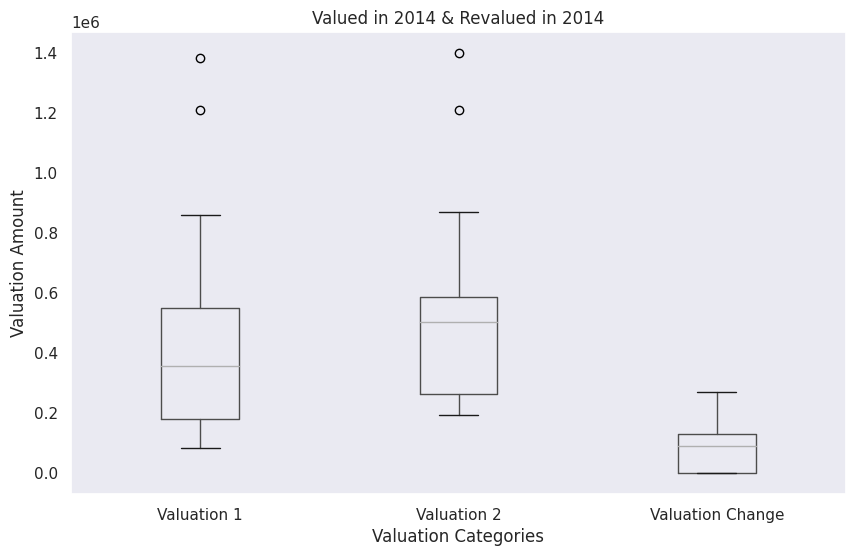

<ipython-input-572-ceb2d3a66786>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valuation_change'] = df['valuation2'] - df['valuation1']


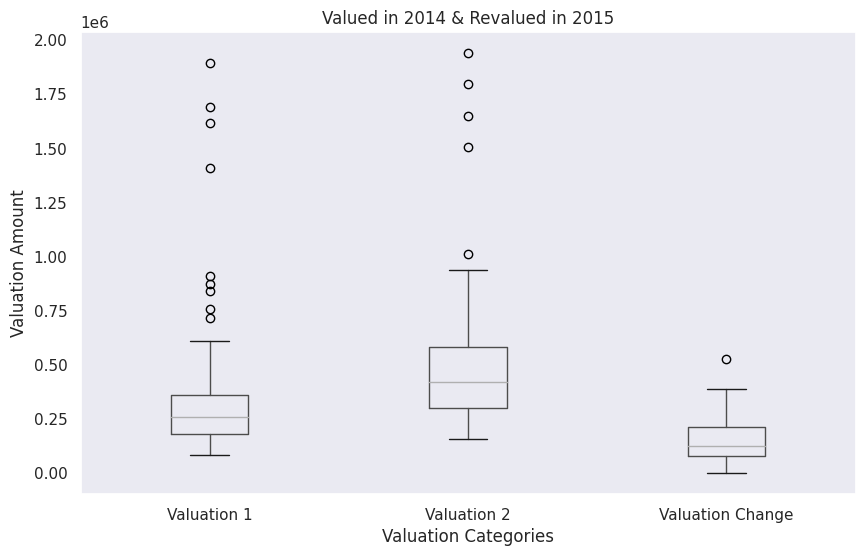

<ipython-input-572-ceb2d3a66786>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['valuation_change'] = df['valuation2'] - df['valuation1']


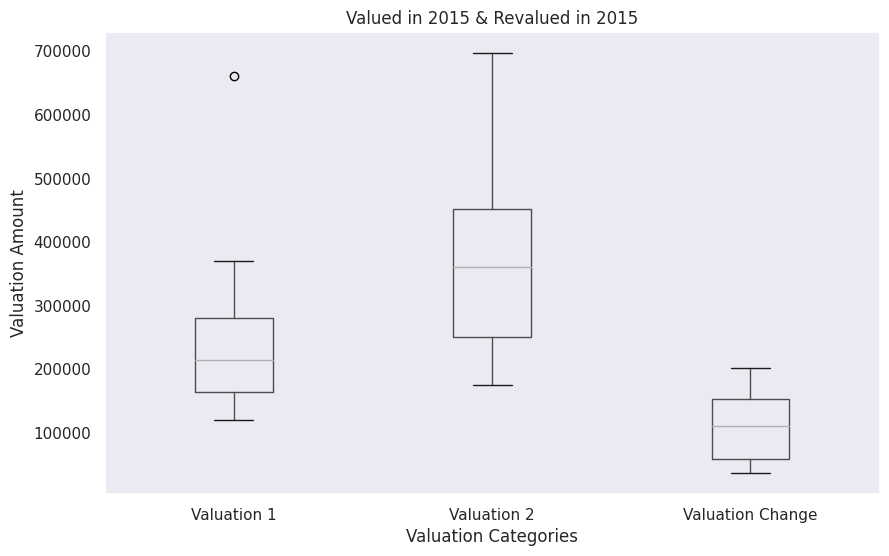

In [ ]:
def create_boxplot_comparison(df, title):
    plt.figure(figsize=(10, 6))
    df['valuation_change'] = df['valuation2'] - df['valuation1']
    boxplot = df.boxplot(column=['valuation1', 'valuation2', 'valuation_change'], grid=False)
    plt.title(title)
    plt.xlabel('Valuation Categories')
    plt.ylabel('Valuation Amount')
    plt.xticks([1, 2, 3], ['Valuation 1', 'Valuation 2', 'Valuation Change'])
    plt.show()

valued_2014_2014 = df1[(df1['valuation_date1'] == 2014) & (df1['valuation_date2'] == 2014)]
valued_2014_2015 = df1[(df1['valuation_date1'] == 2014) & (df1['valuation_date2'] == 2015)]
valued_2015_2015 = df1[(df1['valuation_date1'] == 2015) & (df1['valuation_date2'] == 2015)]

create_boxplot_comparison(valued_2014_2014, 'Valued in 2014 & Revalued in 2014')
create_boxplot_comparison(valued_2014_2015, 'Valued in 2014 & Revalued in 2015')
create_boxplot_comparison(valued_2015_2015, 'Valued in 2015 & Revalued in 2015')

In [ ]:
df=pd.read_csv("/content/kc_house_data.csv")
#df=pd.read_csv("kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
duplicate = df[df.duplicated(subset='id', keep=False)]
duplicate

id             date      price  bedrooms  bathrooms  \
93     6021501535  20140725T000000   430000.0         3       1.50   
94     6021501535  20141223T000000   700000.0         3       1.50   
313    4139480200  20140618T000000  1384000.0         4       3.25   
314    4139480200  20141209T000000  1400000.0         4       3.25   
324    7520000520  20140905T000000   232000.0         2       1.00   
...           ...              ...        ...       ...        ...   
20670  8564860270  20150330T000000   502000.0         4       2.50   
20779  6300000226  20140626T000000   240000.0         4       1.00   
20780  6300000226  20150504T000000   380000.0         4       1.00   
21580  7853420110  20141003T000000   594866.0         3       3.00   
21581  7853420110  20150504T000000   625000.0         3       3.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
93            1580      5000     1.0           0     0  ...      8   
94            1580      5000     1.0           0     0  ...      8   
313           4290     12103     1.0           0     3  ...     11   
314           4290     12103     1.0           0     3  ...     11   
324           1240     12092     1.0           0     0  ...      6   
...            ...       ...     ...         ...   ...  ...    ...   
20670         2680      5539     2.0           0     0  ...      8   
20779         1200      2171     1.5           0     0  ...      7   
20780         1200      2171     1.5           0     0  ...      7   
21580         2780      6000     2.0           0     0  ...      9   
21581         2780      6000     2.0           0     0  ...      9   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
93           1290            290      1939             0    98117  47.6870   
94           1290            290      1939             0    98117  47.6870   
313          2690           1600      1997             0    98006  47.5503   
314          2690           1600      1997             0    98006  47.5503   
324           960            280      1922          1984    98146  47.4957   
...           ...            ...       ...           ...      ...      ...   
20670        2680              0      2013             0    98045  47.4759   
20779        1200              0      1933             0    98133  47.7076   
20780        1200              0      1933             0    98133  47.7076   
21580        2780              0      2013             0    98065  47.5184   
21581        2780              0      2013             0    98065  47.5184   

          long  sqft_living15  sqft_lot15  
93    -122.386           1570        4500  
94    -122.386           1570        4500  
313   -122.102           3860       11244  
314   -122.102           3860       11244  
324   -122.352           1820        7460  
...        ...            ...         ...  
20670 -121.734           2680        5992  
20779 -122.342           1130        1598  
20780 -122.342           1130        1598  
21580 -121.886           2850        6000  
21581 -121.886           2850        6000  

[353 rows x 21 columns]

In [ ]:
duplicate_sorted = duplicate.sort_values(by=['id', 'date'], ascending=[True, False])
duplicate_sorted

id             date     price  bedrooms  bathrooms  \
2497      1000102  20150422T000000  300000.0         6       3.00   
2496      1000102  20140916T000000  280000.0         6       3.00   
16815     7200179  20150424T000000  175000.0         2       1.00   
16814     7200179  20141016T000000  150000.0         2       1.00   
11434   109200390  20141020T000000  250000.0         3       1.75   
...           ...              ...       ...       ...        ...   
6345   9828200460  20140627T000000  260000.0         2       1.00   
15200  9834200305  20150210T000000  615000.0         3       1.00   
15199  9834200305  20140716T000000  350000.0         3       1.00   
1086   9834200885  20150420T000000  550000.0         4       2.50   
1085   9834200885  20140717T000000  360000.0         4       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
2497          2400      9373     2.0           0     0  ...      7   
2496          2400      9373     2.0           0     0  ...      7   
16815          840     12750     1.0           0     0  ...      6   
16814          840     12750     1.0           0     0  ...      6   
11434         1480      3900     1.0           0     0  ...      7   
...            ...       ...     ...         ...   ...  ...    ...   
6345           700      4800     1.0           0     0  ...      7   
15200         1790      3876     1.5           0     0  ...      7   
15199         1790      3876     1.5           0     0  ...      7   
1086          2080      4080     1.0           0     0  ...      7   
1085          2080      4080     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
2497         2400              0      1991             0    98002  47.3262   
2496         2400              0      1991             0    98002  47.3262   
16815         840              0      1925             0    98055  47.4840   
16814         840              0      1925             0    98055  47.4840   
11434        1480              0      1980             0    98023  47.2977   
...           ...            ...       ...           ...      ...      ...   
6345          700              0      1922             0    98122  47.6147   
15200        1090            700      1904             0    98144  47.5750   
15199        1090            700      1904             0    98144  47.5750   
1086         1040           1040      1962             0    98144  47.5720   
1085         1040           1040      1962             0    98144  47.5720   

          long  sqft_living15  sqft_lot15  
2497  -122.214           2060        7316  
2496  -122.214           2060        7316  
16815 -122.211           1480        6969  
16814 -122.211           1480        6969  
11434 -122.367           1830        6956  
...        ...            ...         ...  
6345  -122.300           1440        4800  
15200 -122.288           1360        4080  
15199 -122.288           1360        4080  
1086  -122.290           1340        4080  
1085  -122.290           1340        4080  

[353 rows x 21 columns]

In [ ]:
unique_properties = duplicate_sorted.drop_duplicates(subset='id', keep='first')


In [ ]:
unique_properties

id             date      price  bedrooms  bathrooms  \
2497      1000102  20150422T000000   300000.0         6       3.00   
16815     7200179  20150424T000000   175000.0         2       1.00   
11434   109200390  20141020T000000   250000.0         3       1.75   
12418   123039336  20141208T000000   244900.0         1       1.00   
7793    251300110  20150114T000000   358000.0         3       2.25   
...           ...              ...        ...       ...        ...   
2494   9407110710  20150226T000000   322000.0         3       1.75   
4923   9809000020  20150313T000000  1940000.0         5       2.25   
6346   9828200460  20150106T000000   430000.0         2       1.00   
15200  9834200305  20150210T000000   615000.0         3       1.00   
1086   9834200885  20150420T000000   550000.0         4       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
2497          2400      9373     2.0           0     0  ...      7   
16815          840     12750     1.0           0     0  ...      6   
11434         1480      3900     1.0           0     0  ...      7   
12418          620      8261     1.0           0     0  ...      5   
7793          2510     12013     2.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
2494          1510      8400     1.0           0     0  ...      7   
4923          3120     16672     2.0           0     0  ...      9   
6346           700      4800     1.0           0     0  ...      7   
15200         1790      3876     1.5           0     0  ...      7   
1086          2080      4080     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
2497         2400              0      1991             0    98002  47.3262   
16815         840              0      1925             0    98055  47.4840   
11434        1480              0      1980             0    98023  47.2977   
12418         620              0      1939             0    98106  47.5138   
7793         2510              0      1988             0    98003  47.3473   
...           ...            ...       ...           ...      ...      ...   
2494          980            530      1979             0    98045  47.4476   
4923         3120              0      1969             0    98004  47.6458   
6346          700              0      1922             0    98122  47.6147   
15200        1090            700      1904             0    98144  47.5750   
1086         1040           1040      1962             0    98144  47.5720   

          long  sqft_living15  sqft_lot15  
2497  -122.214           2060        7316  
16815 -122.211           1480        6969  
11434 -122.367           1830        6956  
12418 -122.364           1180        8244  
7793  -122.314           1870        8017  
...        ...            ...         ...  
2494  -121.771           1500       10125  
4923  -122.219           3740       17853  
6346  -122.300           1440        4800  
15200 -122.288           1360        4080  
1086  -122.290           1340        4080  

[176 rows x 21 columns]

In [ ]:
df = pd.concat([df, unique_properties]).drop_duplicates(subset='id', keep=False)

In [ ]:
df.shape

(21260, 21)

In [ ]:
df.isna()

id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...       ...   
21608  False  False  False     False      False        False     False   
21609  False  False  False     False      False        False     False   
21610  False  False  False     False      False        False     False   
21611  False  False  False     False      False        False     False   
21612  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  grade  sqft_above  sqft_basement  \
0       False       False  False  ...  False       False          False   
1       False       False  False  ...  False       False          False   
2       False       False  False  ...  False       False          False   
3       False       False  False  ...  False       False          False   
4       False       False  False  ...  False       False          False   
...       ...         ...    ...  ...    ...         ...            ...   
21608   False       False  False  ...  False       False          False   
21609   False       False  False  ...  False       False          False   
21610   False       False  False  ...  False       False          False   
21611   False       False  False  ...  False       False          False   
21612   False       False  False  ...  False       False          False   

       yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
0         False         False    False  False  False          False   
1         False         False    False  False  False          False   
2         False         False    False  False  False          False   
3         False         False    False  False  False          False   
4         False         False    False  False  False          False   
...         ...           ...      ...    ...    ...            ...   
21608     False         False    False  False  False          False   
21609     False         False    False  False  False          False   
21610     False         False    False  False  False          False   
21611     False         False    False  False  False          False   
21612     False         False    False  False  False          False   

       sqft_lot15  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
21608       False  
21609       False  
21610       False  
21611       False  
21612       False  

[21260 rows x 21 columns]

In [ ]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.126000e+04  2.126000e+04  21260.000000  21260.000000  21260.000000   
mean   4.581059e+09  5.420881e+05      3.372295      2.119932   2085.509548   
std    2.876664e+09  3.678836e+05      0.928313      0.769669    919.858683   
min    1.200019e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.124064e+09  3.249500e+05      3.000000      1.750000   1430.000000   
50%    3.904921e+09  4.510000e+05      3.000000      2.250000   1920.000000   
75%    7.308600e+09  6.468500e+05      4.000000      2.500000   2551.250000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.126000e+04  21260.000000  21260.000000  21260.000000  21260.000000   
mean   1.516437e+04      1.498095      0.007667      0.235936      3.411289   
std    4.165740e+04      0.540786      0.087227      0.767861      0.649774   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.039500e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.606000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.070025e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21260.000000  21260.000000   21260.000000  21260.000000  21260.000000   
mean       7.666557   1793.539417     291.970132   1971.192286     85.058796   
std        1.173127    829.963254     442.986250     29.396700    403.184532   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1570.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2220.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21260.000000  21260.000000  21260.000000   21260.000000   21260.000000  
mean   98077.787723     47.560259   -122.213500    1990.062324   12803.450141  
std       53.435308      0.138637      0.140963     686.020116   27447.132427  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471300   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.572400   -122.229000    1840.000000    7620.000000  
75%    98117.000000     47.678100   -122.124000    2370.000000   10090.250000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

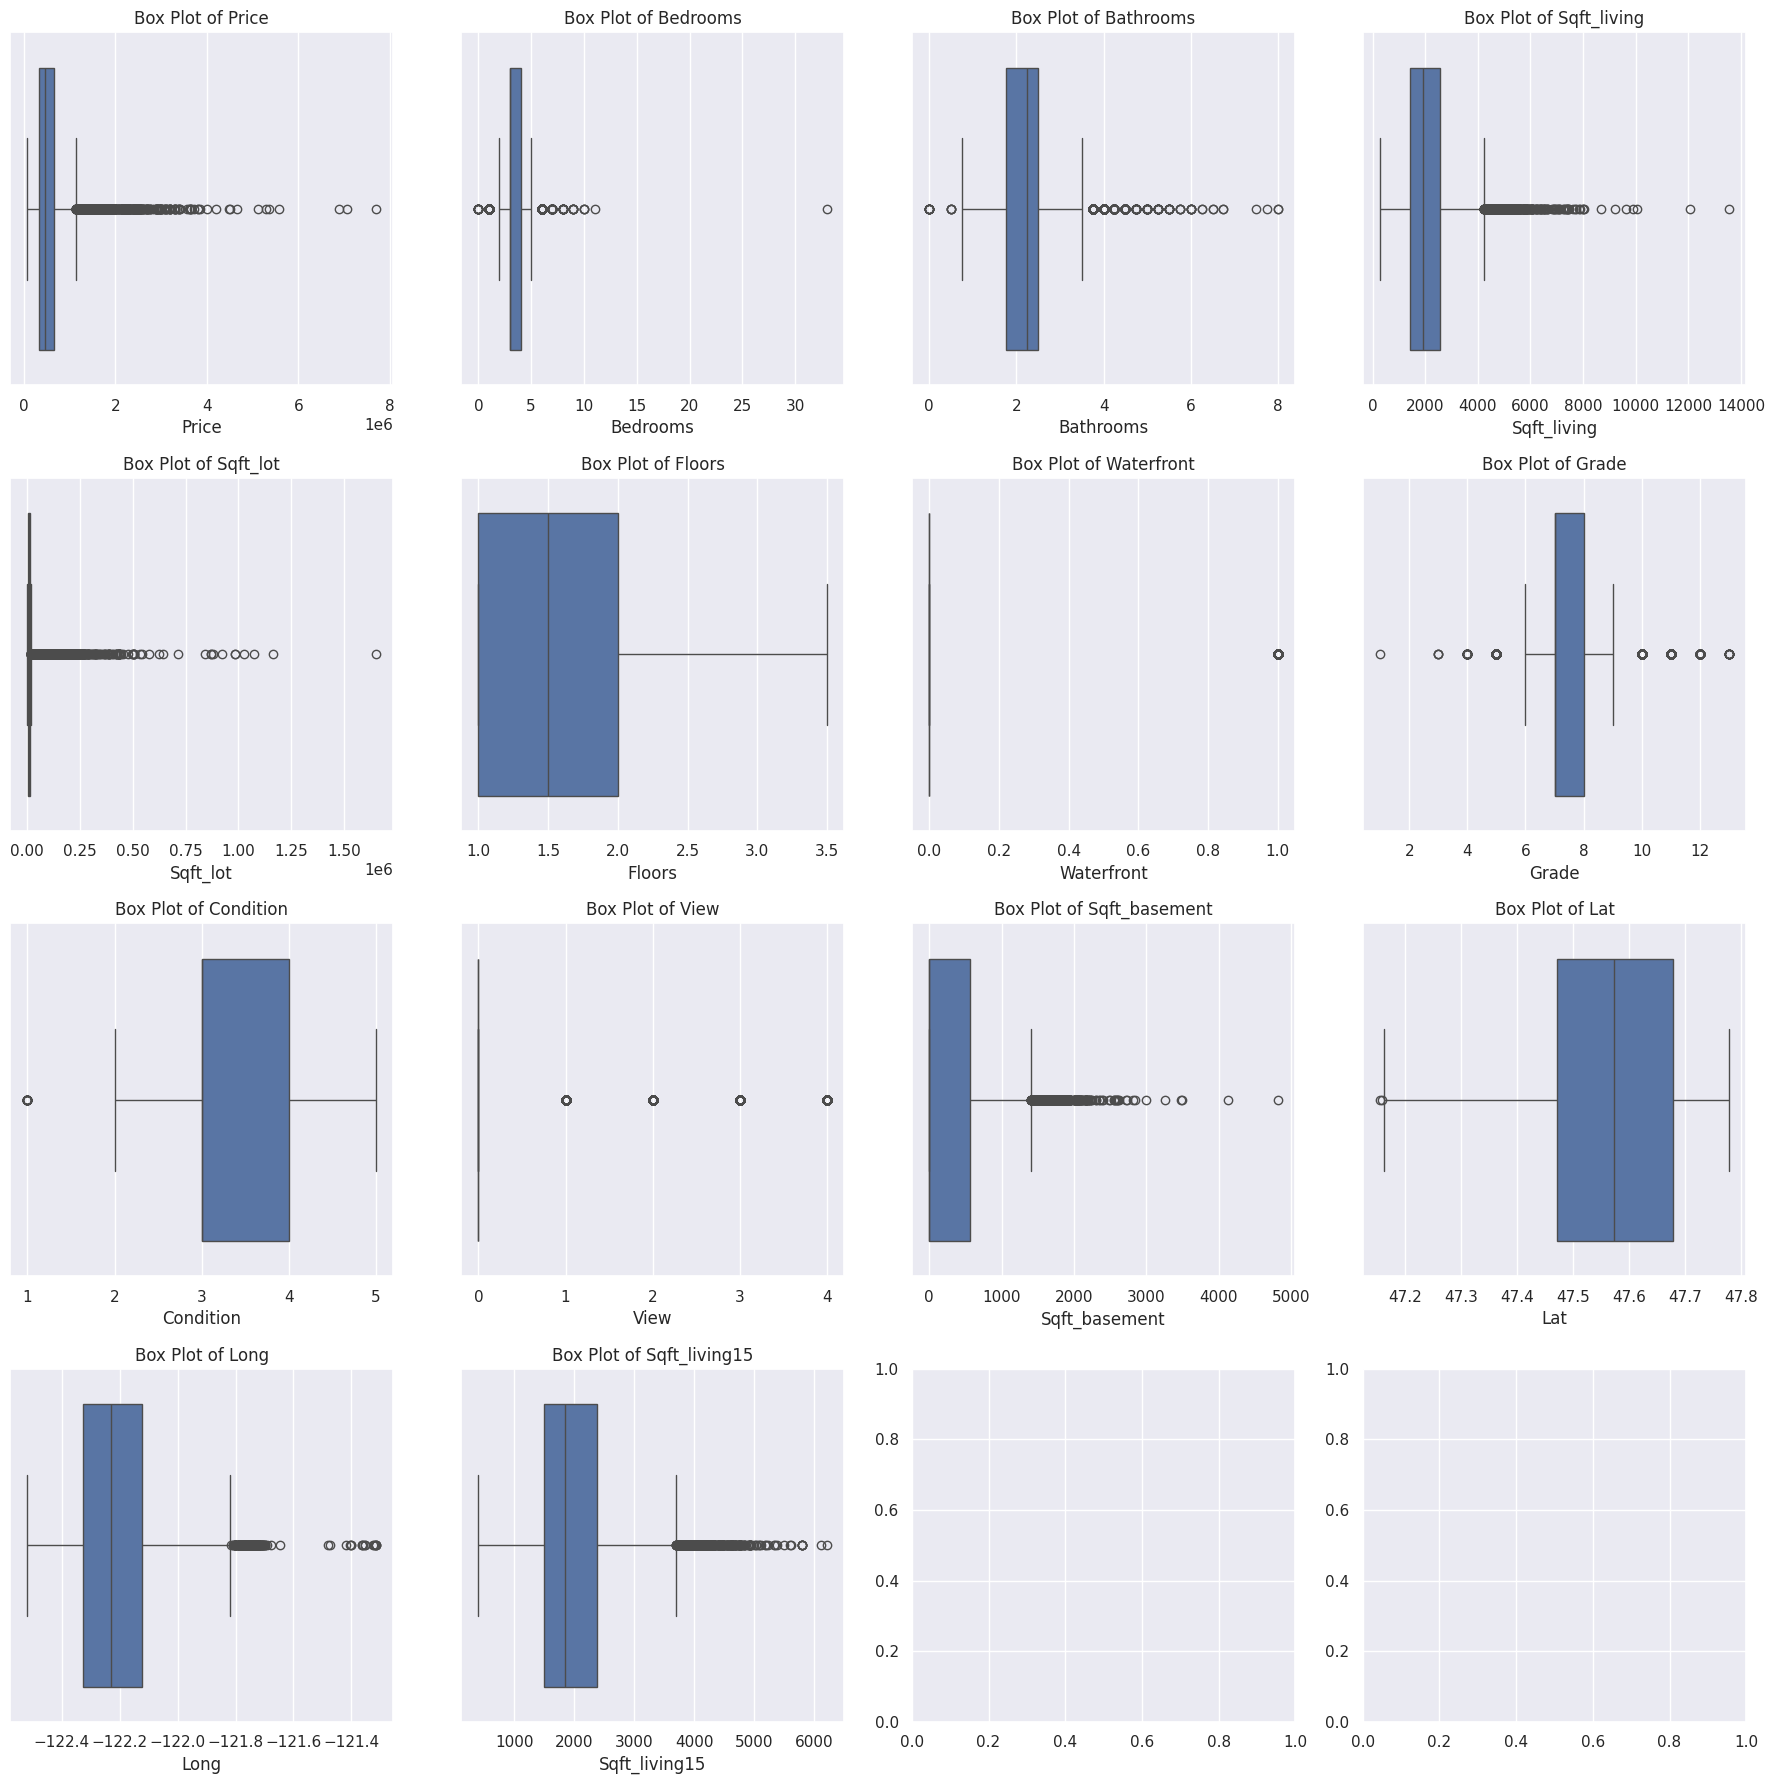

In [ ]:
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                   'waterfront', 'grade', 'condition', 'view', 'sqft_basement', 'lat', 'long', 'sqft_living15']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
plt.tight_layout()
plt.show()


In [ ]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [ ]:
df.shape

(20127, 21)

In [ ]:
df[df['bedrooms'] == 33]

id             date     price  bedrooms  bathrooms  \
15870  2402100895  20140625T000000  640000.0        33       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
15870         1620      6000     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15870        1040            580      1947             0    98103  47.6878   

          long  sqft_living15  sqft_lot15  
15870 -122.331           1330        4700  

[1 rows x 21 columns]

In [ ]:
df['bedrooms'] = np.floor(df['bedrooms'])
df['bathrooms'] = np.floor(df['bathrooms'])
df['floors'] = np.floor(df['floors'])

In [ ]:
Q1_bedrooms = df['bedrooms'].quantile(0.25)
Q3_bedrooms = df['bedrooms'].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms

Q1_bathrooms = df['bathrooms'].quantile(0.25)
Q3_bathrooms = df['bathrooms'].quantile(0.75)
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms

Q1_sqft_living = df['sqft_living'].quantile(0.25)
Q3_sqft_living = df['sqft_living'].quantile(0.75)
IQR_sqft_living = Q3_sqft_living - Q1_sqft_living


lower_bound_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

lower_bound_bathrooms = Q1_bathrooms - 1.5 * IQR_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

lower_bound_sqft_living = Q1_sqft_living - 1.5 * IQR_sqft_living
upper_bound_sqft_living = Q3_sqft_living + 1.5 * IQR_sqft_living

Q1_sqft_living15 = df['sqft_living15'].quantile(0.25)
Q3_sqft_living15 = df['sqft_living15'].quantile(0.75)
IQR_sqft_living15 = Q3_sqft_living15 - Q1_sqft_living15

lower_bound_sqft_living15 = Q1_sqft_living15 - 1.5 * IQR_sqft_living15
upper_bound_sqft_living15 = Q3_sqft_living15 + 1.5 * IQR_sqft_living15

outliers_df = df[
    (((df['bedrooms'] < lower_bound_bedrooms) | (df['bedrooms'] > upper_bound_bedrooms)) |
     ((df['bathrooms'] < lower_bound_bathrooms) | (df['bathrooms'] > upper_bound_bathrooms)) |
     ((df['sqft_living'] < lower_bound_sqft_living) | (df['sqft_living'] > upper_bound_sqft_living)) |
     ((df['sqft_living15'] < lower_bound_sqft_living15) | (df['sqft_living15'] > upper_bound_sqft_living15)))
]


print(outliers_df)


               id             date      price  bedrooms  bathrooms  \
41     7766200013  20140811T000000   775000.0       4.0        2.0   
42     7203220400  20140707T000000   861990.0       5.0        2.0   
70     1525059190  20140912T000000  1040000.0       5.0        3.0   
75     3276920270  20141105T000000   832500.0       4.0        4.0   
115    3626039325  20141121T000000   740500.0       3.0        3.0   
...           ...              ...        ...       ...        ...   
21548  8835770330  20140819T000000  1057000.0       2.0        1.0   
21552   688000017  20140627T000000   516500.0       1.0        1.0   
21561  6664500090  20150115T000000   750000.0       5.0        4.0   
21593  8672200110  20150317T000000  1088000.0       5.0        3.0   
21596  7502800100  20140813T000000   679950.0       5.0        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
41            4220     24186     1.0           0     0  ...      8   
42            3595 

In [ ]:
df = df[~df.index.isin(outliers_df.index)]

In [ ]:
outliers_df[outliers_df['bedrooms'] == 0]

id             date      price  bedrooms  bathrooms  \
875    6306400140  20140612T000000  1095000.0       0.0        0.0   
3119   3918400017  20150205T000000   380000.0       0.0        0.0   
3467   1453602309  20140805T000000   288000.0       0.0        1.0   
4868   6896300380  20141002T000000   228000.0       0.0        1.0   
8477   2569500210  20141117T000000   339950.0       0.0        2.0   
8484   2310060040  20140925T000000   240000.0       0.0        2.0   
9773   3374500520  20150429T000000   355000.0       0.0        0.0   
9854   7849202190  20141223T000000   235000.0       0.0        0.0   
12653  7849202299  20150218T000000   320000.0       0.0        2.0   
14423  9543000205  20150413T000000   139950.0       0.0        0.0   
18379  1222029077  20141029T000000   265000.0       0.0        0.0   
19452  3980300371  20140926T000000   142000.0       0.0        0.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
875           3064      4764     3.0           0     2  ...      7   
3119          1470       979     3.0           0     2  ...      8   
3467          1430      1650     3.0           0     0  ...      7   
4868           390      5900     1.0           0     0  ...      4   
8477          2290      8319     2.0           0     0  ...      8   
8484          1810      5669     2.0           0     0  ...      7   
9773          2460      8049     2.0           0     0  ...      8   
9854          1470      4800     2.0           0     0  ...      7   
12653         1490      7111     2.0           0     0  ...      7   
14423          844      4269     1.0           0     0  ...      7   
18379          384    213444     1.0           0     0  ...      4   
19452          290     20875     1.0           0     0  ...      1   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
875          3064              0      1990             0    98102  47.6362   
3119         1470              0      2006             0    98133  47.7145   
3467         1430              0      1999             0    98125  47.7222   
4868          390              0      1953             0    98118  47.5260   
8477         2290              0      1985             0    98042  47.3473   
8484         1810              0      2003             0    98038  47.3493   
9773         2460              0      1990             0    98031  47.4095   
9854         1470              0      1996             0    98065  47.5265   
12653        1490              0      1999             0    98065  47.5261   
14423         844              0      1913             0    98001  47.2781   
18379         384              0      2003             0    98070  47.4177   
19452         290              0      1963             0    98024  47.5308   

          long  sqft_living15  sqft_lot15  
875   -122.322           2360        4000  
3119  -122.356           1470        1399  
3467  -122.290           1430        1650  
4868  -122.261           2170        6000  
8477  -122.151           2500        8751  
8484  -122.053           1810        5685  
9773  -122.168           2520        8050  
9854  -121.828           1060        7200  
12653 -121.826           1500        4675  
14423 -122.250           1380        9600  
18379 -122.491           1920      224341  
19452 -121.888           1620       22850  

[12 rows x 21 columns]

In [ ]:
outliers_df[outliers_df['bedrooms'] == 33]

id             date     price  bedrooms  bathrooms  \
15870  2402100895  20140625T000000  640000.0      33.0        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
15870         1620      6000     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15870        1040            580      1947             0    98103  47.6878   

          long  sqft_living15  sqft_lot15  
15870 -122.331           1330        4700  

[1 rows x 21 columns]

In [ ]:
df.shape

(19078, 21)

In [ ]:
df = df[~(((df['bedrooms'] < lower_bound_bedrooms) | (df['bedrooms'] > upper_bound_bedrooms)) |
          ((df['bathrooms'] < lower_bound_bathrooms) | (df['bathrooms'] > upper_bound_bathrooms)) |
          ((df['sqft_living'] < lower_bound_sqft_living) | (df['sqft_living'] > upper_bound_sqft_living)))]

In [ ]:
df.shape

(19078, 21)

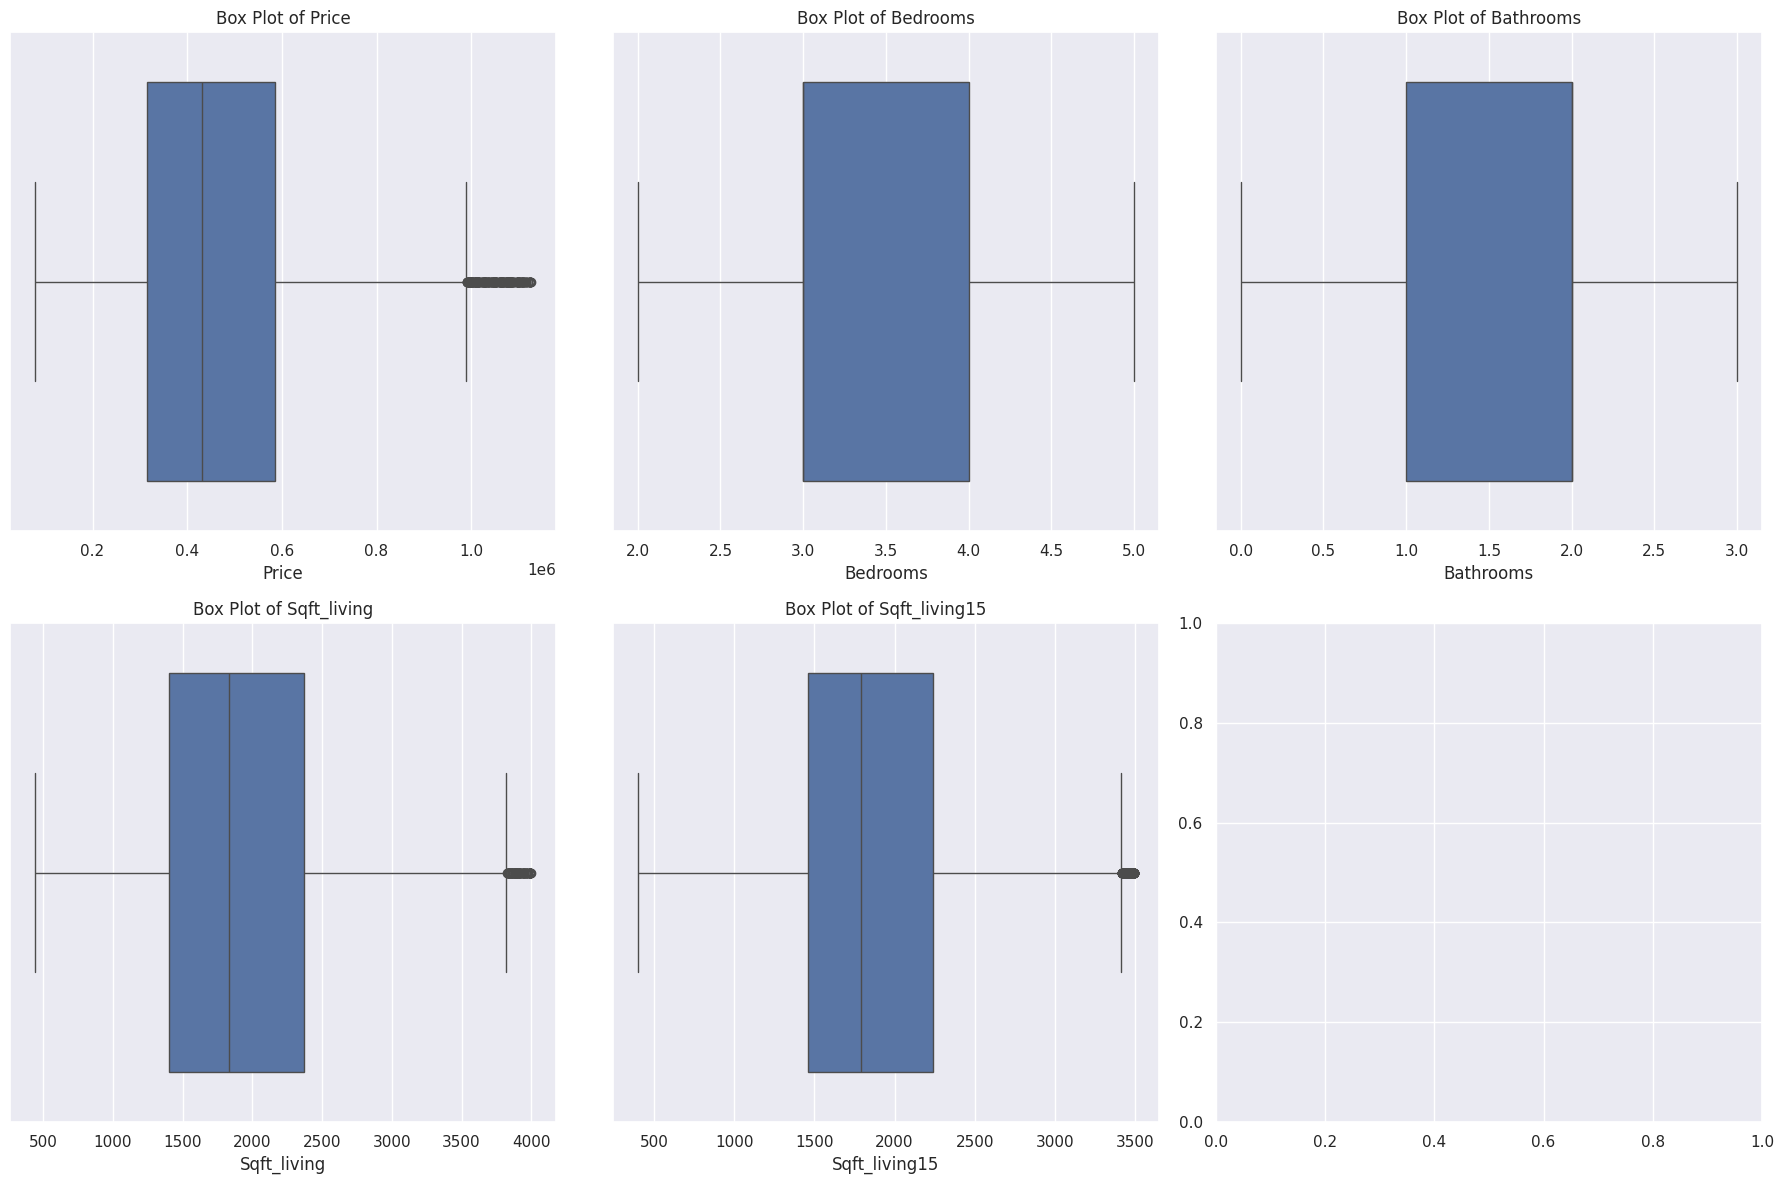

In [ ]:
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
plt.tight_layout()
plt.show()

In [ ]:
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0        1.0   
1      6414100192  20141209T000000  538000.0       3.0        2.0   
2      5631500400  20150225T000000  180000.0       2.0        1.0   
3      2487200875  20141209T000000  604000.0       4.0        3.0   
4      1954400510  20150218T000000  510000.0       3.0        2.0   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0        2.0   
21609  6600060120  20150223T000000  400000.0       4.0        2.0   
21610  1523300141  20140623T000000  402101.0       2.0        0.0   
21611   291310100  20150116T000000  400000.0       3.0        2.0   
21612  1523300157  20141015T000000  325000.0       2.0        0.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[19078 rows x 21 columns]

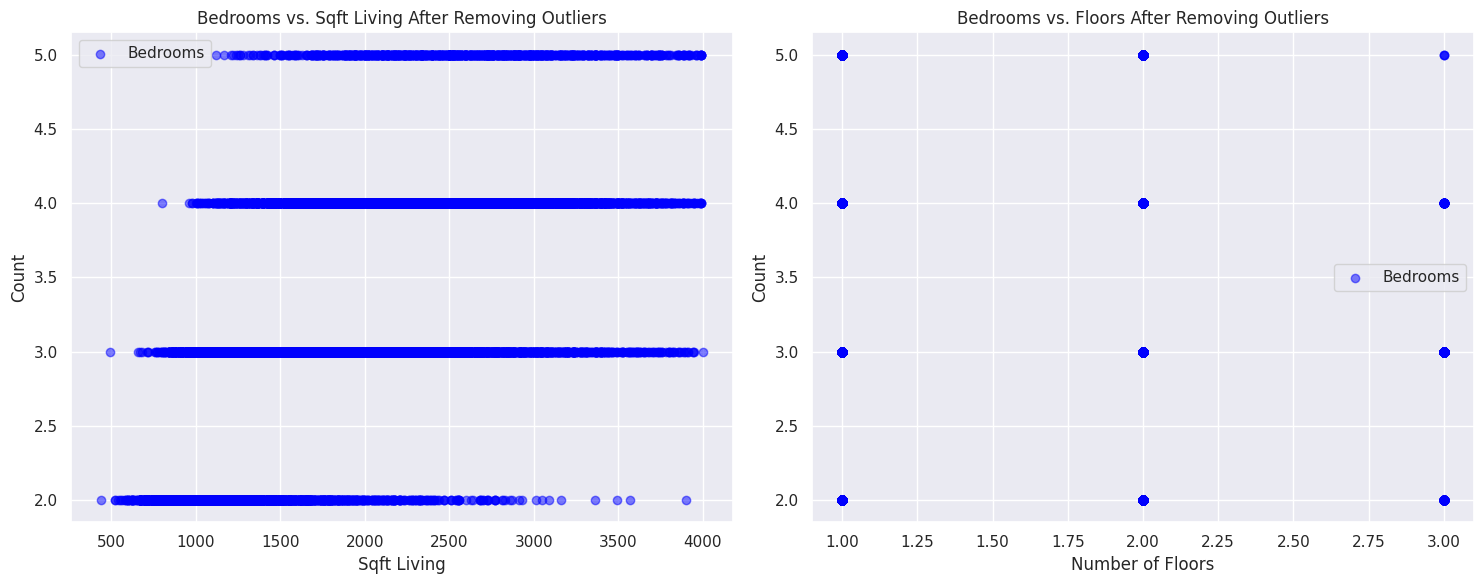

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.scatter(df['sqft_living'], df['bedrooms'], alpha=0.5, label='Bedrooms', color='blue')
ax1.set_title('Bedrooms vs. Sqft Living After Removing Outliers')
ax1.set_xlabel('Sqft Living')
ax1.set_ylabel('Count')
ax1.legend()
ax1.grid(True)


ax2.scatter(df['floors'], df['bedrooms'], alpha=0.5, label='Bedrooms', color='blue')
ax2.set_title('Bedrooms vs. Floors After Removing Outliers')
ax2.set_xlabel('Number of Floors')
ax2.set_ylabel('Count')
ax2.legend()
ax2.grid(True)


plt.tight_layout()

plt.show()

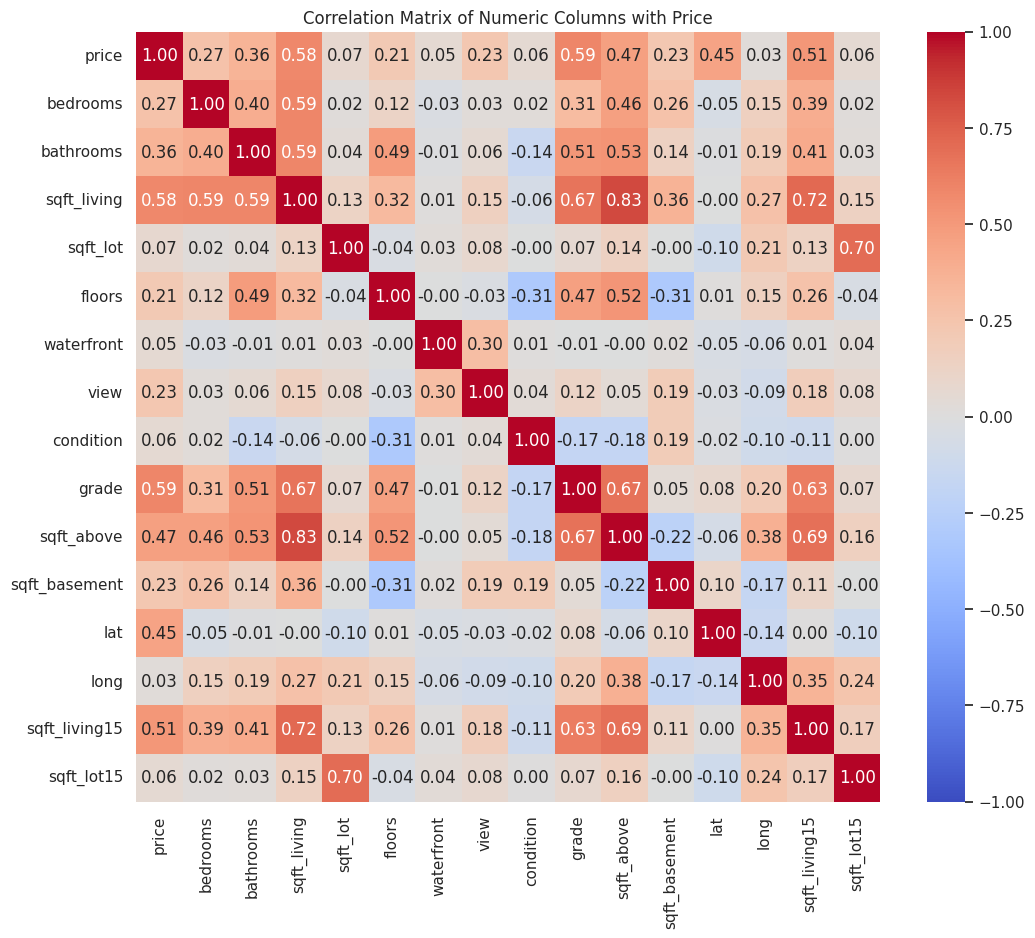

In [ ]:
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                    'floors', 'waterfront', 'view', 'condition', 'grade',
                    'sqft_above', 'sqft_basement','lat', 'long', 'sqft_living15', 'sqft_lot15']

# Create a new DataFrame with only the selected numeric columns
numeric_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns with Price')
plt.show()

In [ ]:
significant_columns = correlation_matrix[abs(correlation_matrix) > 0.5].index.tolist()
significant_columns

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

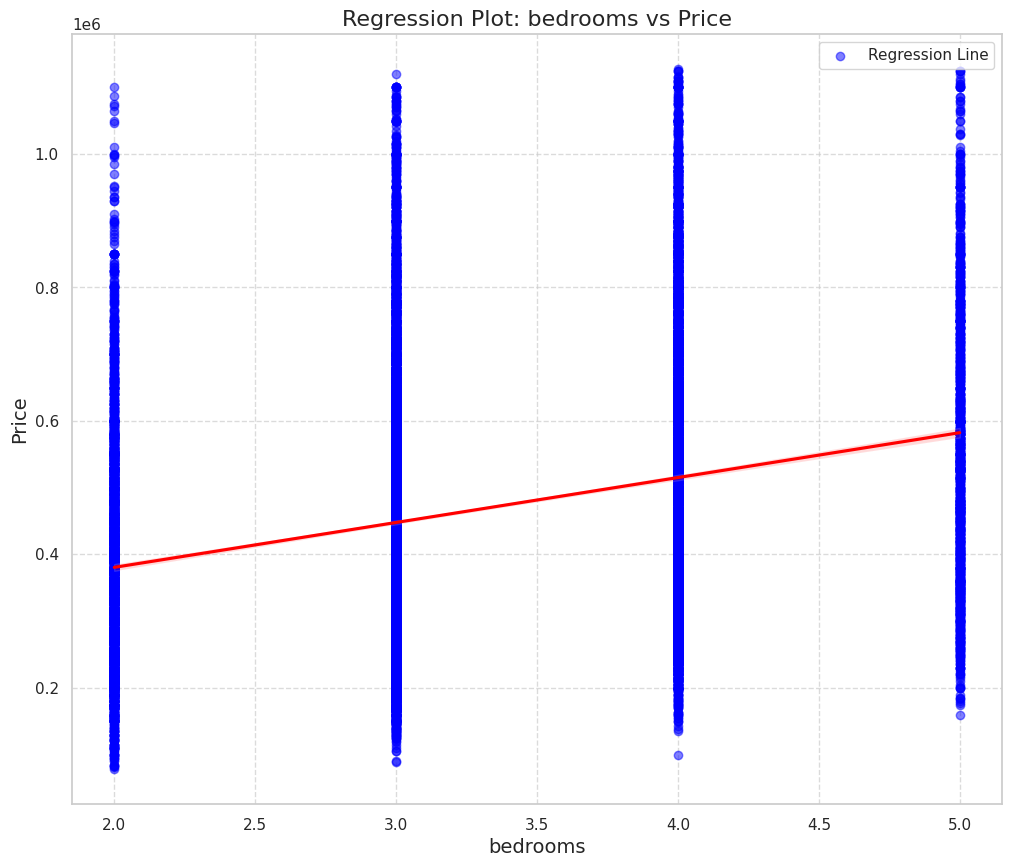

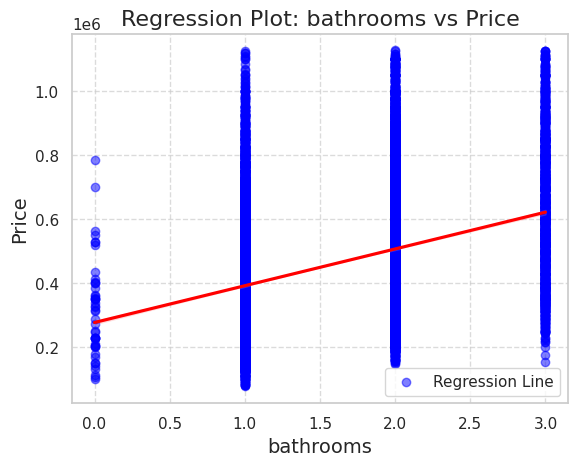

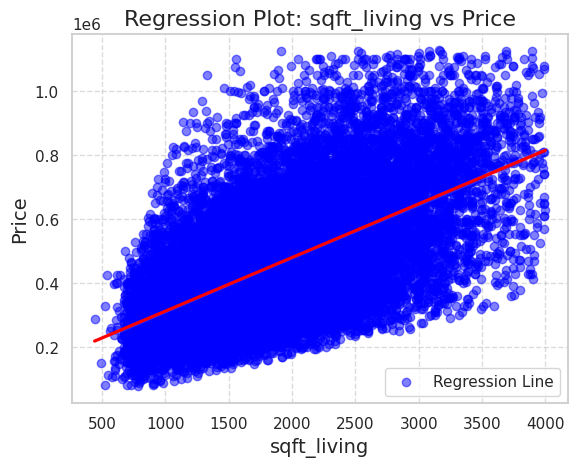

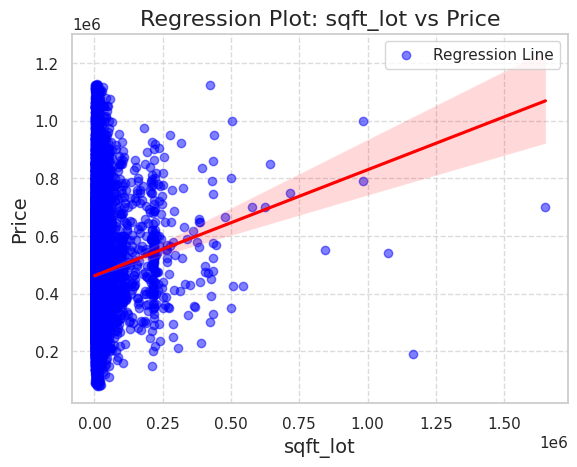

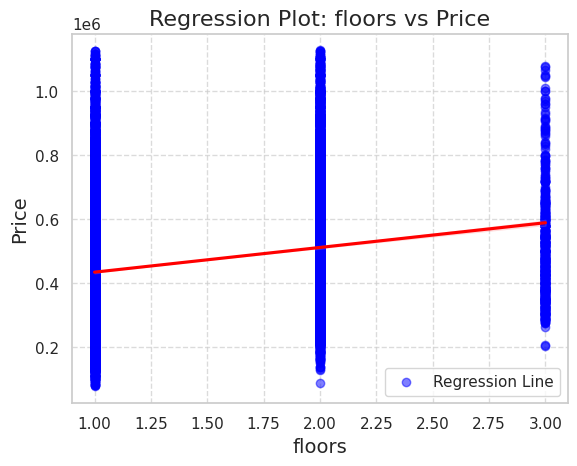

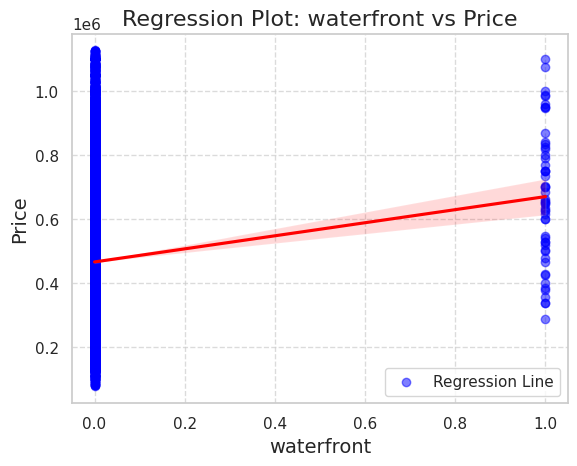

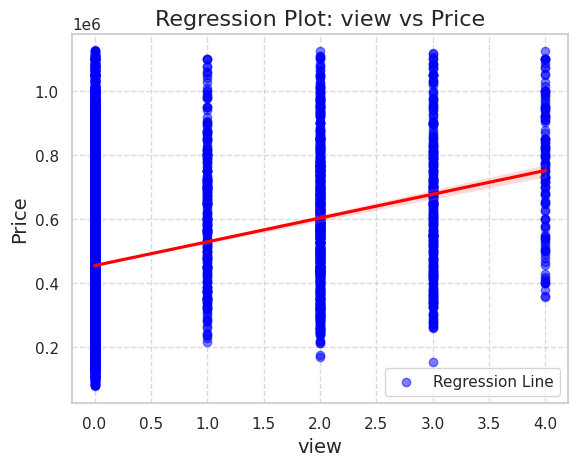

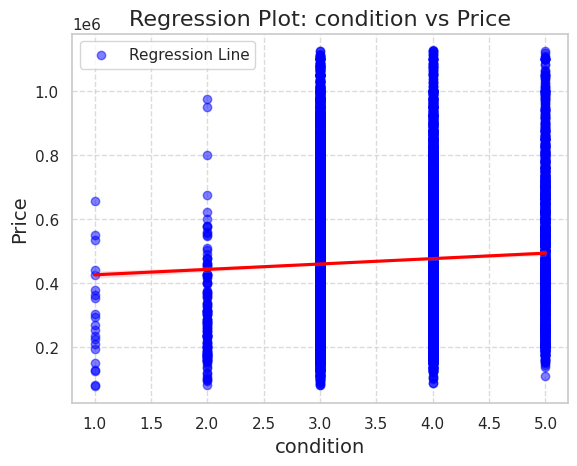

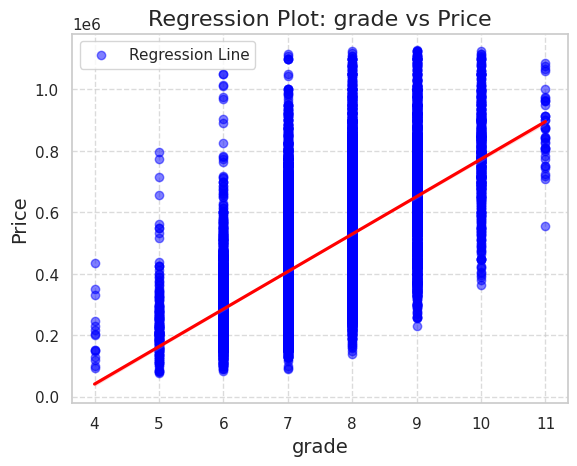

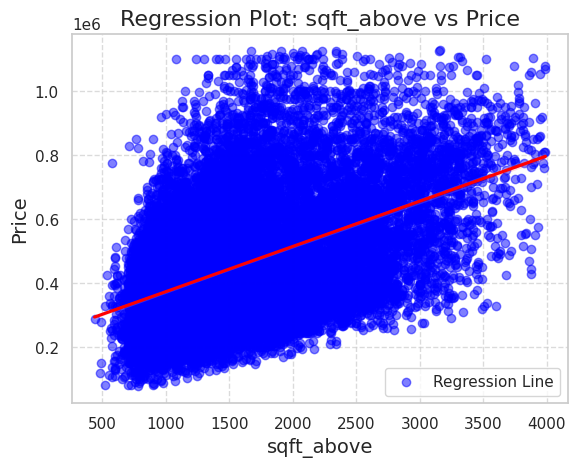

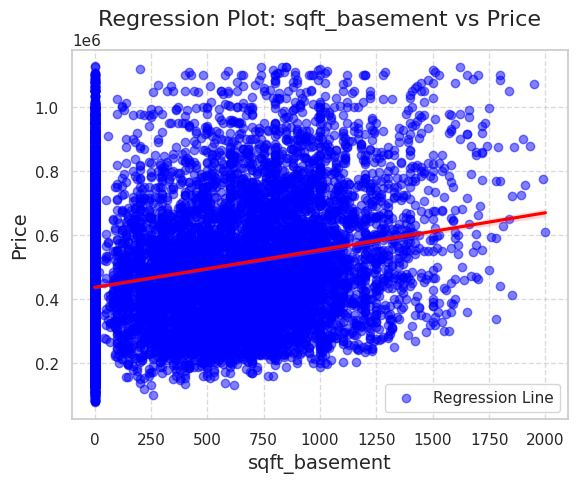

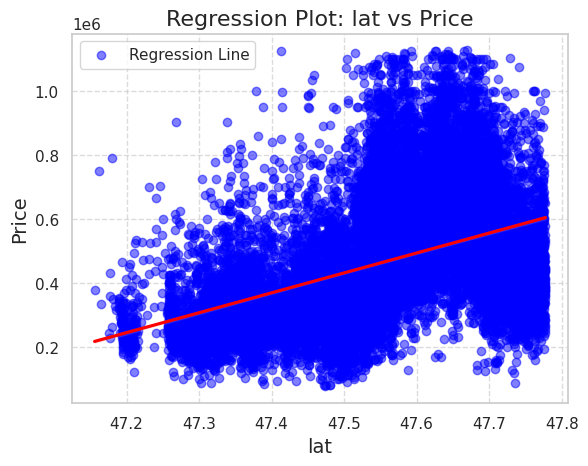

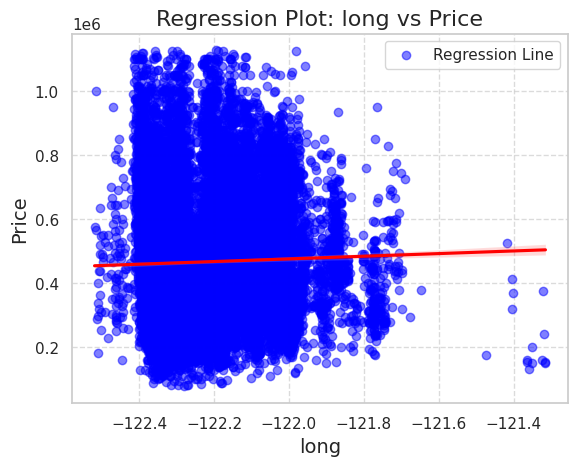

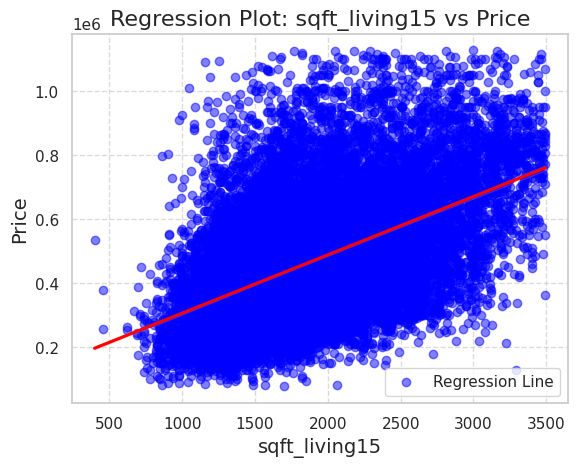

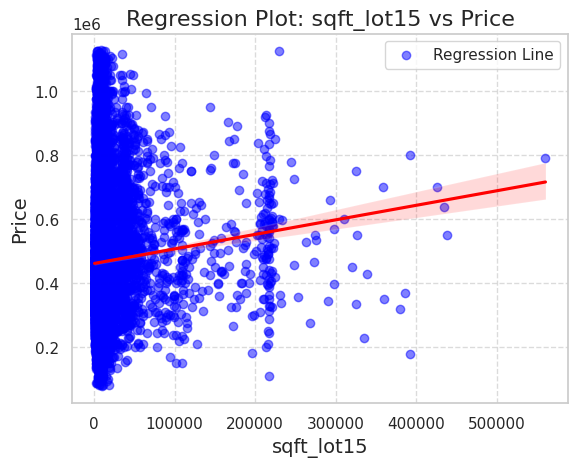

In [ ]:
sns.set_style("whitegrid")

# Set up the figure
plt.figure(figsize=(12, 10))

# Loop through significant_columns
for column in significant_columns:
    if column != 'price':
        # Create regression plot
        sns.regplot(x=column, y='price', data=df, scatter_kws={'alpha': 0.5, 'color': 'blue'}, line_kws={"color": "red"})

        # Add title, labels, and adjust layout
        plt.title(f'Regression Plot: {column} vs Price', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Price', fontsize=14)

        # Add grid and legend
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(['Regression Line'], loc='best')

        # Show plot
        plt.show()

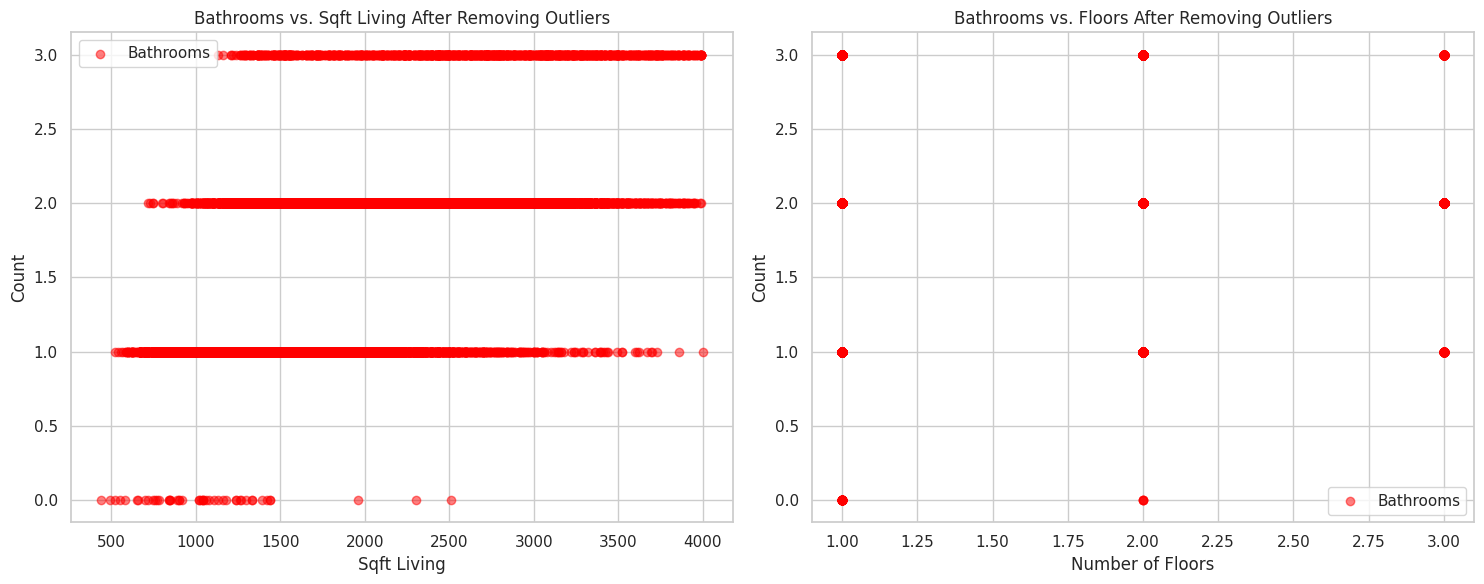

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


ax1.scatter(df['sqft_living'], df['bathrooms'], alpha=0.5, label='Bathrooms', color='red')
ax1.set_title('Bathrooms vs. Sqft Living After Removing Outliers')
ax1.set_xlabel('Sqft Living')
ax1.set_ylabel('Count')
ax1.legend()
ax1.grid(True)


ax2.scatter(df['floors'], df['bathrooms'], alpha=0.5, label='Bathrooms', color='red')
ax2.set_title('Bathrooms vs. Floors After Removing Outliers')
ax2.set_xlabel('Number of Floors')
ax2.set_ylabel('Count')
ax2.legend()
ax2.grid(True)


plt.tight_layout()

plt.show()

In [ ]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.907800e+04  1.907800e+04  19078.000000  19078.000000  19078.000000   
mean   4.620468e+09  4.673517e+05      3.290387      1.651903   1919.921166   
std    2.878774e+09  1.980200e+05      0.781236      0.613032    684.532701   
min    1.200019e+06  7.800000e+04      2.000000      0.000000    440.000000   
25%    2.150988e+09  3.150000e+05      3.000000      1.000000   1400.000000   
50%    3.943250e+09  4.310000e+05      3.000000      2.000000   1830.000000   
75%    7.347350e+09  5.850622e+05      4.000000      2.000000   2370.000000   
max    9.900000e+09  1.127000e+06      5.000000      3.000000   4000.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.907800e+04  19078.000000  19078.000000  19078.000000  19078.000000   
mean   1.392736e+04      1.421585      0.002830      0.162700      3.415977   
std    3.823696e+04      0.550257      0.053128      0.619737      0.647931   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.000000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.440000e+03      1.000000      0.000000      0.000000      3.000000   
75%    1.012500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.000000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  19078.000000  19078.000000   19078.000000  19078.000000  19078.000000   
mean       7.490355   1662.372366     257.548800   1970.733358     73.223661   
std        0.961810    654.734664     391.835991     29.021171    375.212691   
min        4.000000    440.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1170.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1500.000000       0.000000   1974.000000      0.000000   
75%        8.000000   2040.000000     500.000000   1995.000000      0.000000   
max       11.000000   3990.000000    2000.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  19078.000000  19078.000000  19078.000000   19078.000000   19078.000000  
mean   98078.680994     47.555956   -122.215423    1882.672345   11956.386152  
std       53.525578      0.141961      0.141364     553.120843   24930.772648  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.456825   -122.331000    1460.000000    5000.000000  
50%    98065.000000     47.566550   -122.236000    1788.000000    7500.000000  
75%    98118.000000     47.679975   -122.126000    2240.000000    9750.000000  
max    98199.000000     47.777600   -121.315000    3494.000000  560617.000000

In [ ]:
df[df['price'] == 1.093000e+06]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [ ]:
df[df['price'] == 7.800000e+04]

id             date    price  bedrooms  bathrooms  sqft_living  \
15293  40000362  20140506T000000  78000.0       2.0        1.0          780   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15293     16344     1.0           0     0  ...      5         780   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
15293              0      1942             0    98168  47.4739 -122.28   

       sqft_living15  sqft_lot15  
15293           1700       10387  

[1 rows x 21 columns]

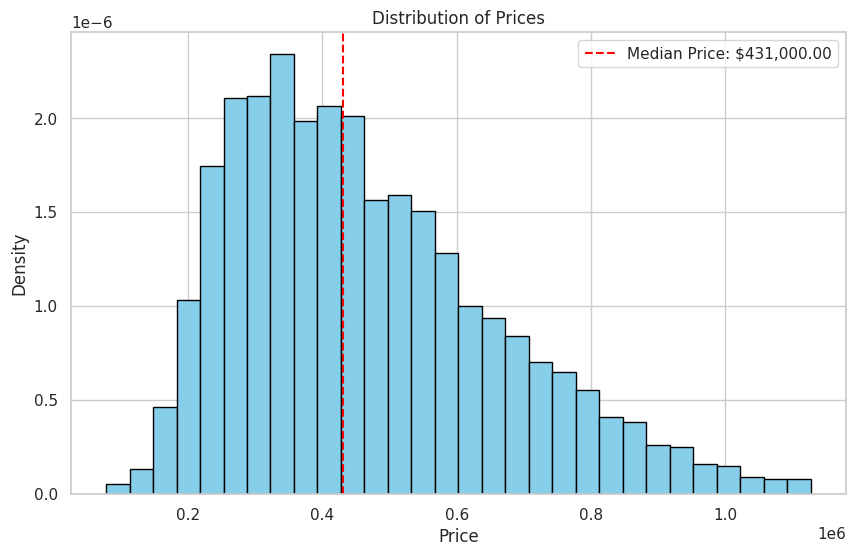

In [ ]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['price'], bins=30, color='skyblue', edgecolor='black', density=True)
median_price = np.median(df['price'])

peak_bin = bins[np.argmax(n)]

plt.axvline(median_price, color='red', linestyle='--', label='Median Price: ${:,.2f}'.format(median_price))

plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
median_price = 431000

high_price = df[df['price'] >= median_price]

low_price = df[df['price'] < median_price]

In [ ]:
high_price

id             date      price  bedrooms  bathrooms  \
1      6414100192  20141209T000000   538000.0       3.0        2.0   
3      2487200875  20141209T000000   604000.0       4.0        3.0   
4      1954400510  20150218T000000   510000.0       3.0        2.0   
10     1736800520  20150403T000000   662500.0       3.0        2.0   
11     9212900260  20140527T000000   468000.0       2.0        1.0   
...           ...              ...        ...       ...        ...   
21601  5100403806  20150407T000000   467000.0       3.0        2.0   
21603  7852140040  20140825T000000   507250.0       3.0        2.0   
21605  3448900210  20141014T000000   610685.0       4.0        2.0   
21606  7936000429  20150326T000000  1007500.0       4.0        3.0   
21607  2997800021  20150219T000000   475000.0       3.0        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
1             2570      7242     2.0           0     0  ...      7   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
10            3560      9796     1.0           0     0  ...      8   
11            1160      6000     1.0           0     0  ...      7   
...            ...       ...     ...         ...   ...  ...    ...   
21601         1425      1179     3.0           0     0  ...      8   
21603         2270      5536     2.0           0     0  ...      8   
21605         2520      6023     2.0           0     0  ...      9   
21606         3510      7200     2.0           0     0  ...      9   
21607         1310      1294     2.0           0     0  ...      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
1            2170            400      1951          1991    98125  47.7210   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
10           1860           1700      1965             0    98007  47.6007   
11            860            300      1942             0    98115  47.6900   
...           ...            ...       ...           ...      ...      ...   
21601        1425              0      2008             0    98125  47.6963   
21603        2270              0      2003             0    98065  47.5389   
21605        2520              0      2014             0    98056  47.5137   
21606        2600            910      2009             0    98136  47.5537   
21607        1180            130      2008             0    98116  47.5773   

          long  sqft_living15  sqft_lot15  
1     -122.319           1690        7639  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
10    -122.145           2210        8925  
11    -122.292           1330        6000  
...        ...            ...         ...  
21601 -122.318           1285        1253  
21603 -121.881           2270        5731  
21605 -122.167           2520        6023  
21606 -122.398           2050        6200  
21607 -122.409           1330        1265  

[9550 rows x 21 columns]

In [ ]:
low_price

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0        1.0   
2      5631500400  20150225T000000  180000.0       2.0        1.0   
6      1321400060  20140627T000000  257500.0       3.0        2.0   
7      2008000270  20150115T000000  291850.0       3.0        1.0   
8      2414600126  20150415T000000  229500.0       3.0        1.0   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0        2.0   
21609  6600060120  20150223T000000  400000.0       4.0        2.0   
21610  1523300141  20140623T000000  402101.0       2.0        0.0   
21611   291310100  20150116T000000  400000.0       3.0        2.0   
21612  1523300157  20141015T000000  325000.0       2.0        0.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
6             1715      6819     2.0           0     0  ...      7   
7             1060      9711     1.0           0     0  ...      7   
8             1780      7470     1.0           0     0  ...      7   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
2             770              0      1933             0    98028  47.7379   
6            1715              0      1995             0    98003  47.3097   
7            1060              0      1963             0    98198  47.4095   
8            1050            730      1960             0    98146  47.5123   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
2     -122.233           2720        8062  
6     -122.327           2238        6819  
7     -122.315           1650        9711  
8     -122.337           1780        8113  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[9528 rows x 21 columns]

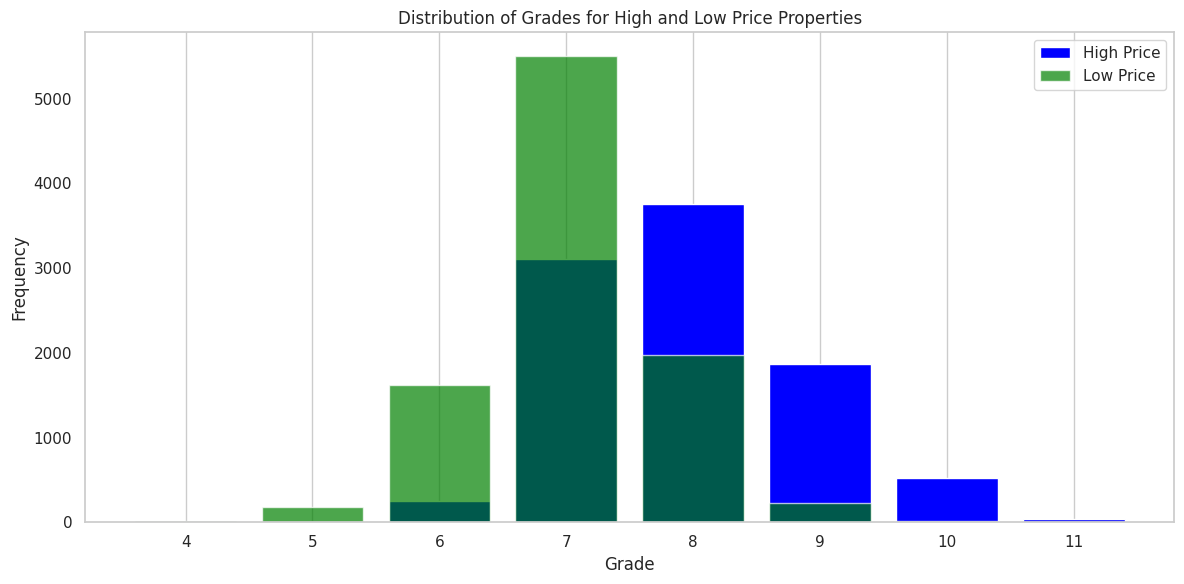

In [ ]:
grades_high = high_price['grade'].value_counts().sort_index()
grades_low = low_price['grade'].value_counts().sort_index()

# Get all unique grades present in both high_price and low_price datasets
all_grades = sorted(set(grades_high.index) | set(grades_low.index))

# Plotting
plt.figure(figsize=(12, 6))

# Plot grades for high-price properties
plt.bar(all_grades, grades_high.reindex(all_grades, fill_value=0), color='blue', label='High Price')

# Plot grades for low-price properties
plt.bar(all_grades, grades_low.reindex(all_grades, fill_value=0), color='green', label='Low Price', alpha=0.7)

# Customize plot
plt.title('Distribution of Grades for High and Low Price Properties')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

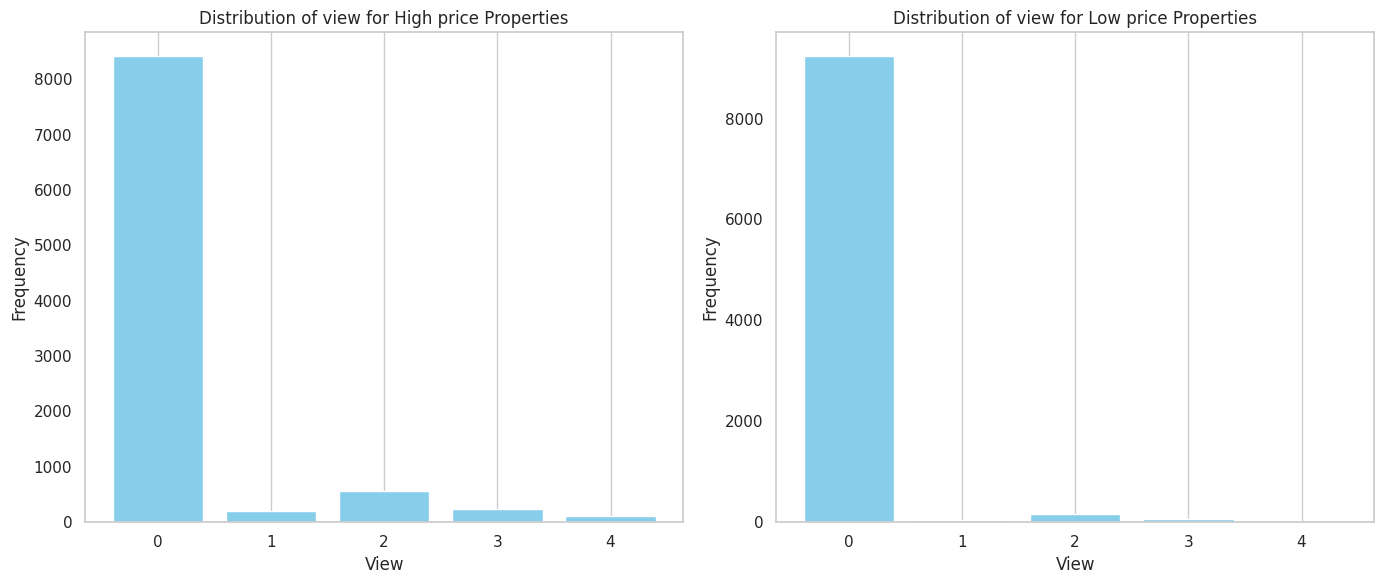

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].bar(high_price['view'].value_counts().sort_index().index, high_price['view'].value_counts().sort_index(), color='skyblue')
axs[0].set_title('Distribution of view for High price Properties')
axs[0].set_xlabel('View')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=0)
axs[0].grid(axis='y')

axs[1].bar(low_price['view'].value_counts().sort_index().index, low_price['view'].value_counts().sort_index(), color='skyblue')
axs[1].set_title('Distribution of view for Low price Properties')
axs[1].set_xlabel('View')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=0)
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
df['waterfront'].describe()

count    19078.000000
mean         0.002830
std          0.053128
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

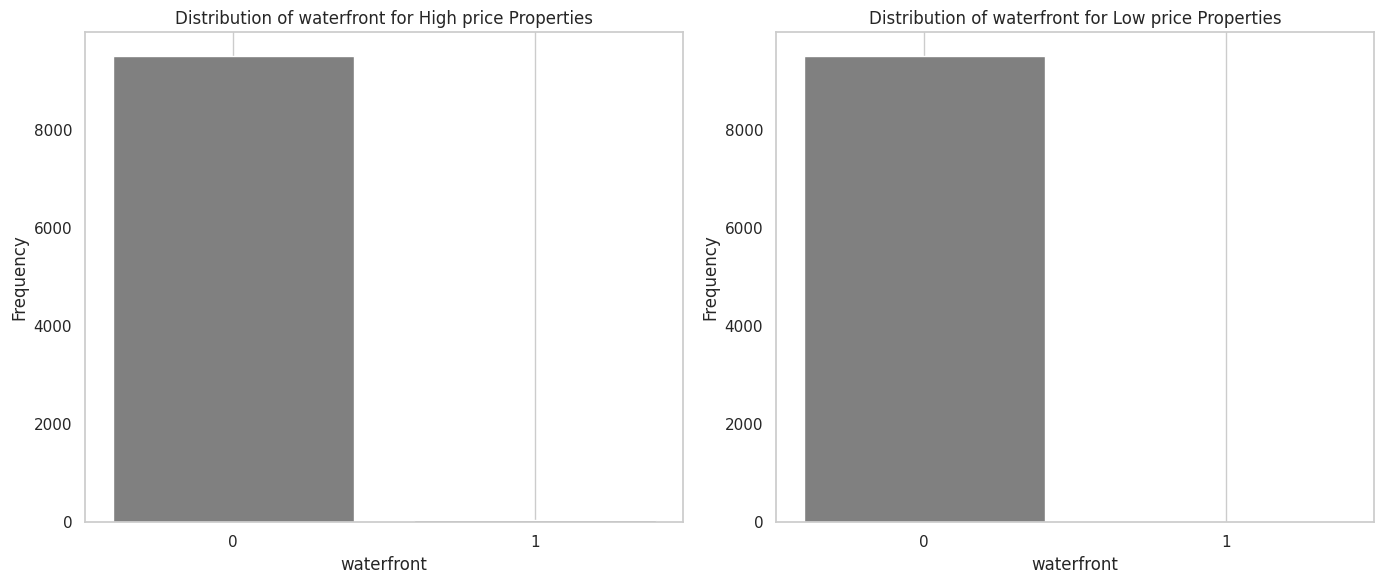

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].bar(high_price['waterfront'].value_counts().sort_index().index,
           high_price['waterfront'].value_counts().sort_index(),
           color='gray')
axs[0].set_title('Distribution of waterfront for High price Properties')
axs[0].set_xlabel('waterfront')
axs[0].set_ylabel('Frequency')
axs[0].set_xticks([0, 1])
axs[0].grid(axis='y')

axs[1].bar(low_price['waterfront'].value_counts().sort_index().index,
           low_price['waterfront'].value_counts().sort_index(),
           color='gray')
axs[1].set_title('Distribution of waterfront for Low price Properties')
axs[1].set_xlabel('waterfront')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks([0, 1])
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
correlation = df['waterfront'].corr(df['price'])
print("Correlation between waterfront and prices:", correlation)


Correlation between waterfront and prices: 0.054723953636999306


As the correlation of water front is very low. therefore we see no difference in its distribution with the two price categories

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
df['price_category'] = df['price'].apply(lambda x: 'High' if x > median_price else 'Low')
map_heat = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

In [ ]:
df_high_price = df[df['price_category'] == 'High']
df_low_price = df[df['price_category'] == 'Low']

In [ ]:
HeatMap(data=df_high_price[['lat', 'long']], radius=10, blur=15, gradient={0.4: 'blue', 0.65: 'purple', 1: 'red'}, name='High Price').add_to(map_heat)
HeatMap(data=df_low_price[['lat', 'long']], radius=10, blur=15, gradient={0.4: 'green', 0.65: 'yellow', 1: 'orange'}, name='Low Price').add_to(map_heat)

In [ ]:
folium.LayerControl().add_to(map_heat)

In [ ]:
map_heat

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df[['lat', 'long']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

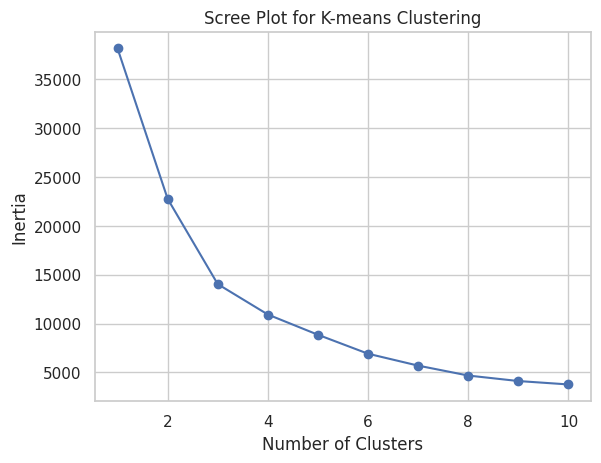

In [ ]:
inertia = []

k_values = range(1, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for K-means Clustering')
plt.show()

In [ ]:
map_clusters = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_colors = ['red', 'blue', 'orange']

for cluster in range(num_clusters):
    cluster_df = df[df['cluster'] == cluster]
    avg_price = cluster_df['price'].mean()
    folium.Marker(location=[cluster_df['lat'].mean(), cluster_df['long'].mean()],
                  popup=f'Cluster {cluster+1}<br>Avg. Price: ${avg_price:.2f}',
                  icon=folium.Icon(color=cluster_colors[cluster])).add_to(map_clusters)

map_clusters

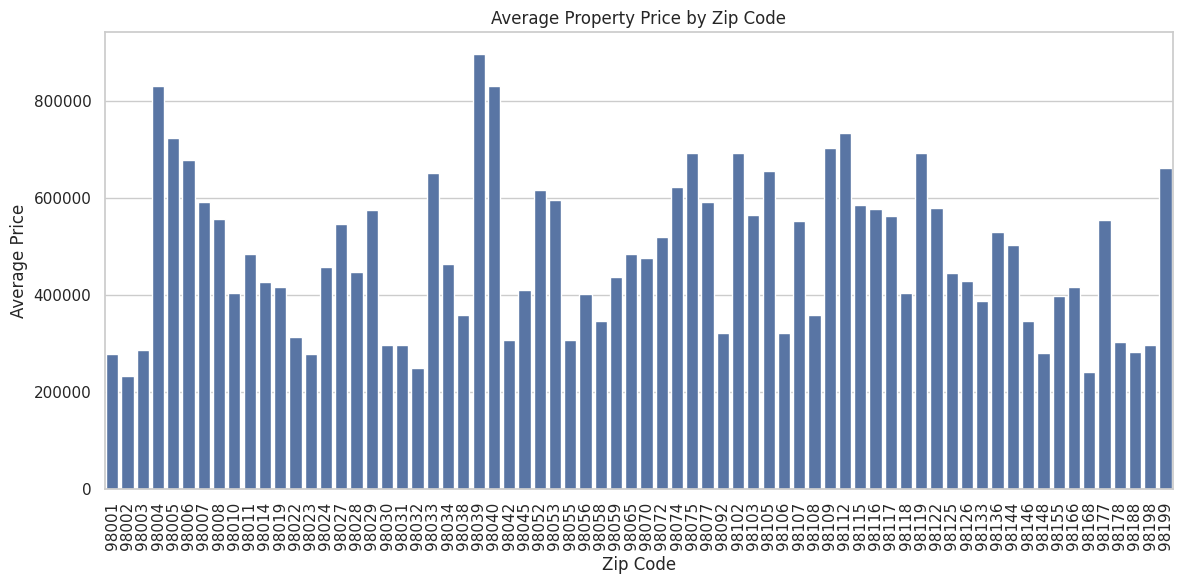

<Figure size 640x480 with 0 Axes>

In [ ]:
avg_price_by_zip = df.groupby('zipcode')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='zipcode', y='price', data=avg_price_by_zip)
plt.title('Average Property Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

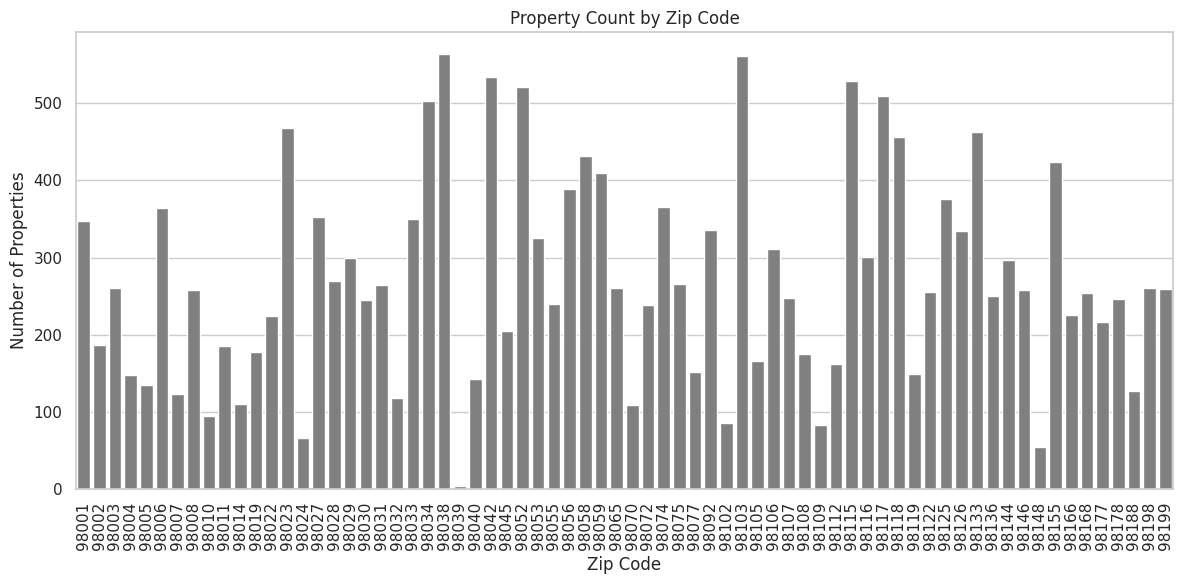

In [ ]:
property_count_by_zip = df['zipcode'].value_counts().reset_index()
property_count_by_zip.columns = ['zipcode', 'property_count']

property_count_by_zip = property_count_by_zip.sort_values(by='property_count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='zipcode', y='property_count', data=property_count_by_zip, color= 'gray')
plt.title('Property Count by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Properties')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
price_stats_by_zip = df.groupby('zipcode')['price'].agg(['mean', 'median']).reset_index()

q25 = price_stats_by_zip['median'].quantile(0.25)
q75 = price_stats_by_zip['median'].quantile(0.75)


In [ ]:
def assign_price_category(median_price):
    if median_price < q25:
        return 'Low-priced'
    elif median_price >= q25 and median_price < q75:
        return 'Medium-priced'
    else:
        return 'High-priced'

price_stats_by_zip['price_category'] = price_stats_by_zip['median'].apply(assign_price_category)

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_category',
       'cluster'],
      dtype='object')

In [ ]:
df.drop(columns= 'cluster', inplace= True)

In [ ]:
df['price_category'].nunique()

2

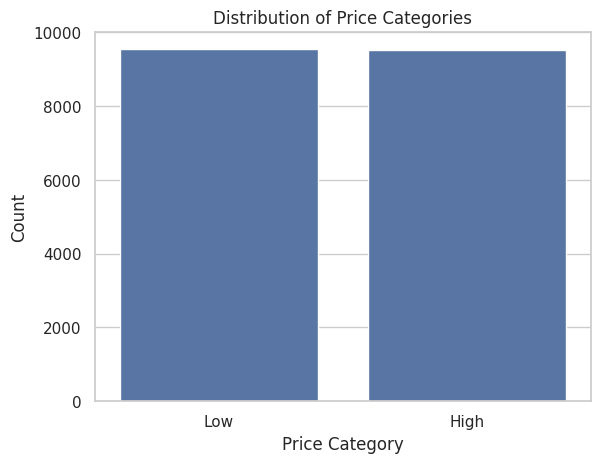

In [ ]:
sns.countplot(x='price_category', data=df)
plt.title('Distribution of Price Categories')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

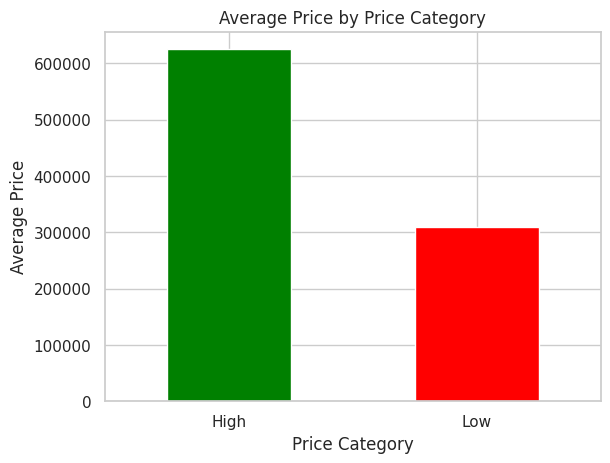

In [ ]:
avg_price_by_category = df.groupby('price_category')['price'].mean()
avg_price_by_category.plot(kind='bar', color=['green', 'red'])
plt.title('Average Price by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [ ]:
ff0= df[df['sqft_living'] == (df['sqft_above']+df['sqft_basement'])]
ff0

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0       3.0        1.0   
1      6414100192  20141209T000000  538000.0       3.0        2.0   
2      5631500400  20150225T000000  180000.0       2.0        1.0   
3      2487200875  20141209T000000  604000.0       4.0        3.0   
4      1954400510  20150218T000000  510000.0       3.0        2.0   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0       3.0        2.0   
21609  6600060120  20150223T000000  400000.0       4.0        2.0   
21610  1523300141  20140623T000000  402101.0       2.0        0.0   
21611   291310100  20150116T000000  400000.0       3.0        2.0   
21612  1523300157  20141015T000000  325000.0       2.0        0.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
0             1180      5650     1.0           0     0  ...        1180   
1             2570      7242     2.0           0     0  ...        2170   
2              770     10000     1.0           0     0  ...         770   
3             1960      5000     1.0           0     0  ...        1050   
4             1680      8080     1.0           0     0  ...        1680   
...            ...       ...     ...         ...   ...  ...         ...   
21608         1530      1131     3.0           0     0  ...        1530   
21609         2310      5813     2.0           0     0  ...        2310   
21610         1020      1350     2.0           0     0  ...        1020   
21611         1600      2388     2.0           0     0  ...        1600   
21612         1020      1076     2.0           0     0  ...        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  price_category  
0               1340        5650             Low  
1               1690        7639            High  
2               2720        8062             Low  
3               1360        5000            High  
4               1800        7503            High  
...              ...         ...             ...  
21608           1530        1509             Low  
21609           1830        7200             Low  
21610           1020        2007             Low  
21611           1410        1287             Low  
21612           1020        1357             Low  

[19078 rows x 22 columns]

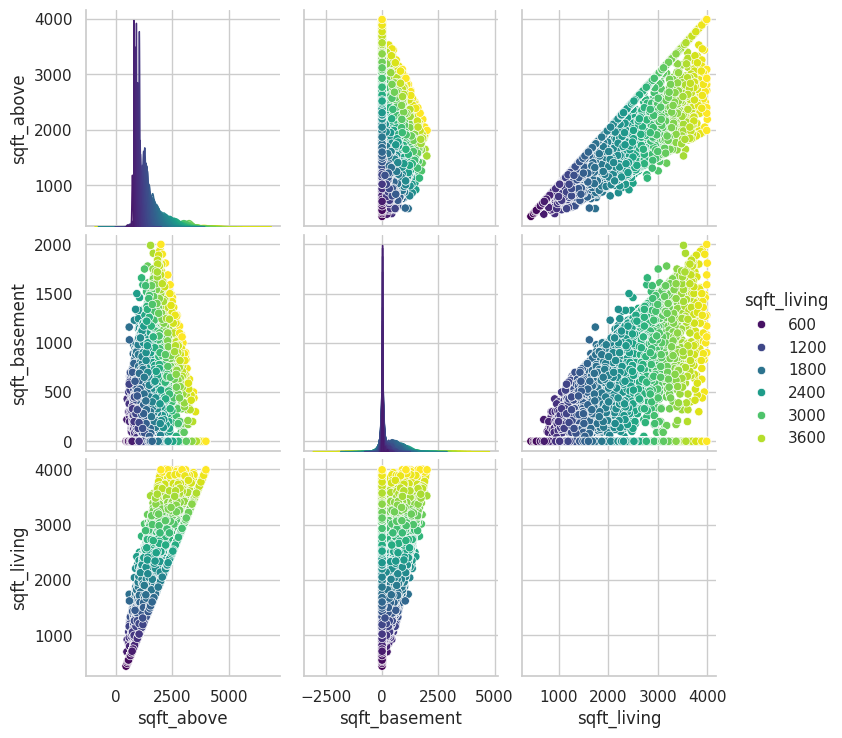

In [ ]:
sns.pairplot(df, vars=['sqft_above', 'sqft_basement', 'sqft_living'], hue='sqft_living', palette='viridis')
plt.show()

In [ ]:
ff= df[df['sqft_living'] > df['sqft_lot']]
ff

id             date     price  bedrooms  bathrooms  \
63     9528102996  20141207T000000  549000.0       3.0        1.0   
116    3362400431  20140626T000000  518500.0       3.0        3.0   
175    7234600798  20150210T000000  425000.0       3.0        2.0   
406    7821200390  20140806T000000  450000.0       3.0        2.0   
547    7899800860  20150319T000000  259950.0       2.0        2.0   
...           ...              ...       ...       ...        ...   
21595  1972201967  20141031T000000  520000.0       2.0        2.0   
21601  5100403806  20150407T000000  467000.0       3.0        2.0   
21604  9834201367  20150126T000000  429000.0       3.0        2.0   
21607  2997800021  20150219T000000  475000.0       3.0        2.0   
21608   263000018  20140521T000000  360000.0       3.0        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
63            1540      1044     3.0           0     0  ...        1540   
116           1590      1102     3.0           0     0  ...        1590   
175           1120      1100     2.0           0     0  ...         820   
406           1290      1213     3.0           0     0  ...        1290   
547           1070       649     2.0           0     0  ...         720   
...            ...       ...     ...         ...   ...  ...         ...   
21595         1530       981     3.0           0     0  ...        1480   
21601         1425      1179     3.0           0     0  ...        1425   
21604         1490      1126     3.0           0     0  ...        1490   
21607         1310      1294     2.0           0     0  ...        1180   
21608         1530      1131     3.0           0     0  ...        1530   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
63                 0      2014             0    98115  47.6765 -122.320   
116                0      2010             0    98103  47.6824 -122.347   
175              300      2008             0    98122  47.6106 -122.310   
406                0      2001             0    98103  47.6609 -122.344   
547              350      2008             0    98106  47.5213 -122.357   
...              ...       ...           ...      ...      ...      ...   
21595             50      2006             0    98103  47.6533 -122.346   
21601              0      2008             0    98125  47.6963 -122.318   
21604              0      2014             0    98144  47.5699 -122.288   
21607            130      2008             0    98116  47.5773 -122.409   
21608              0      2009             0    98103  47.6993 -122.346   

       sqft_living15  sqft_lot15  price_category  
63              1580        3090            High  
116             1620        3166            High  
175             1590        1795             Low  
406             1290        3235            High  
547             1070         928             Low  
...              ...         ...             ...  
21595           1530        1282            High  
21601           1285        1253            High  
21604           1400        1230             Low  
21607           1330        1265            High  
21608           1530        1509             Low  

[759 rows x 22 columns]

In [ ]:
ff1= df[(df['sqft_living'] > df['sqft_lot']) & (df['yr_renovated'] > 0)]
ff1

id             date     price  bedrooms  bathrooms  \
1373   8032700140  20141028T000000  830000.0       5.0        3.0   
4458   6848200018  20140528T000000  840000.0       4.0        2.0   
6130   9126101511  20150428T000000  863500.0       4.0        3.0   
10892  9828200746  20150504T000000  440000.0       2.0        1.0   
13253  2877104196  20141206T000000  760000.0       3.0        2.0   
13620  7011201475  20140527T000000  780000.0       3.0        3.0   
18535  3667500015  20140925T000000  770000.0       4.0        3.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
1373          2920      2808     2.0           0     0  ...        2140   
4458          3040      2800     2.0           0     0  ...        2100   
6130          3250      2760     2.0           0     0  ...        2420   
10892         1120      1024     2.0           0     0  ...        1120   
13253         1780      1750     1.0           0     2  ...        1400   
13620         2520      2152     1.0           0     0  ...        1560   
18535         3680      2242     2.0           0     0  ...        2670   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1373             780      1960          1992    98103  47.6540 -122.342   
4458             940      1906          2014    98102  47.6245 -122.327   
6130             830      1905          2007    98122  47.6104 -122.303   
10892              0      1970          1998    98122  47.6175 -122.298   
13253            380      1927          2014    98103  47.6797 -122.357   
13620            960      1925          2006    98119  47.6363 -122.371   
18535           1010      1930          2007    98112  47.6192 -122.307   

       sqft_living15  sqft_lot15  price_category  
1373            1620        1544            High  
4458            1260        2178            High  
6130            1260        2780            High  
10892           1120        1549            High  
13253           1780        3750            High  
13620           1140        2152            High  
18535           1350        1288            High  

[7 rows x 22 columns]

In [ ]:
ff2= df[(df['sqft_living'] > df['sqft_lot']) & (df['floors'] > 1) & (df['yr_renovated'] == 0)]
ff2

id             date     price  bedrooms  bathrooms  \
63     9528102996  20141207T000000  549000.0       3.0        1.0   
116    3362400431  20140626T000000  518500.0       3.0        3.0   
175    7234600798  20150210T000000  425000.0       3.0        2.0   
406    7821200390  20140806T000000  450000.0       3.0        2.0   
547    7899800860  20150319T000000  259950.0       2.0        2.0   
...           ...              ...       ...       ...        ...   
21595  1972201967  20141031T000000  520000.0       2.0        2.0   
21601  5100403806  20150407T000000  467000.0       3.0        2.0   
21604  9834201367  20150126T000000  429000.0       3.0        2.0   
21607  2997800021  20150219T000000  475000.0       3.0        2.0   
21608   263000018  20140521T000000  360000.0       3.0        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
63            1540      1044     3.0           0     0  ...        1540   
116           1590      1102     3.0           0     0  ...        1590   
175           1120      1100     2.0           0     0  ...         820   
406           1290      1213     3.0           0     0  ...        1290   
547           1070       649     2.0           0     0  ...         720   
...            ...       ...     ...         ...   ...  ...         ...   
21595         1530       981     3.0           0     0  ...        1480   
21601         1425      1179     3.0           0     0  ...        1425   
21604         1490      1126     3.0           0     0  ...        1490   
21607         1310      1294     2.0           0     0  ...        1180   
21608         1530      1131     3.0           0     0  ...        1530   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
63                 0      2014             0    98115  47.6765 -122.320   
116                0      2010             0    98103  47.6824 -122.347   
175              300      2008             0    98122  47.6106 -122.310   
406                0      2001             0    98103  47.6609 -122.344   
547              350      2008             0    98106  47.5213 -122.357   
...              ...       ...           ...      ...      ...      ...   
21595             50      2006             0    98103  47.6533 -122.346   
21601              0      2008             0    98125  47.6963 -122.318   
21604              0      2014             0    98144  47.5699 -122.288   
21607            130      2008             0    98116  47.5773 -122.409   
21608              0      2009             0    98103  47.6993 -122.346   

       sqft_living15  sqft_lot15  price_category  
63              1580        3090            High  
116             1620        3166            High  
175             1590        1795             Low  
406             1290        3235            High  
547             1070         928             Low  
...              ...         ...             ...  
21595           1530        1282            High  
21601           1285        1253            High  
21604           1400        1230             Low  
21607           1330        1265            High  
21608           1530        1509             Low  

[743 rows x 22 columns]

In [ ]:
ff1_indices = set(ff1.index)
ff2_indices = set(ff2.index)


ff3 = ff[~ff.index.isin(ff1_indices.union(ff2_indices))]
ff3

id             date     price  bedrooms  bathrooms  \
1549   8816400885  20141008T000000  450000.0       4.0        1.0   
5229   9828702890  20150211T000000  760000.0       5.0        1.0   
13278  3277800845  20140711T000000  370000.0       3.0        1.0   
13874  3705000120  20140729T000000  284000.0       3.0        2.0   
15743  9828702895  20141022T000000  700000.0       4.0        1.0   
15910  4310701330  20150309T000000  415000.0       3.0        1.0   
16931  5016002275  20140602T000000  610000.0       5.0        2.0   
17924  8032700175  20141027T000000  420000.0       4.0        1.0   
20979  9895000040  20140703T000000  399900.0       2.0        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
1549          1640      1480     1.0           0     0  ...         820   
5229          3050      2992     1.0           0     0  ...        1920   
13278         1170      1105     1.0           0     0  ...        1170   
13874         2080      2050     1.0           0     0  ...        1550   
15743         2420       520     1.0           0     0  ...        2420   
15910         1220       835     1.0           0     0  ...        1220   
16931         3990      3839     1.0           0     0  ...        1990   
17924         1510      1501     1.0           0     0  ...        1510   
20979         1410      1005     1.0           0     0  ...         900   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1549             820      1912             0    98105  47.6684 -122.314   
5229            1130      1931             0    98112  47.6210 -122.302   
13278              0      1965             0    98126  47.5448 -122.375   
13874            530      2003             0    98042  47.4199 -122.157   
15743              0      1900             0    98112  47.6209 -122.302   
15910              0      1950             0    98103  47.6981 -122.341   
16931           2000      1962             0    98112  47.6236 -122.299   
17924              0      1906             0    98103  47.6526 -122.342   
20979            510      2011             0    98027  47.5446 -122.018   

       sqft_living15  sqft_lot15  price_category  
1549            1420        2342            High  
5229            1200        1209            High  
13278           1380        1399             Low  
13874           2080        2275             Low  
15743           1200        1170            High  
15910           1360        1251             Low  
16931           2090        5000            High  
17924           1560        1602             Low  
20979           1440        1188             Low  

[9 rows x 22 columns]

<ipython-input-640-dd10e1541815>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dataset', data=data, palette=['skyblue', 'lightgreen', 'salmon'])


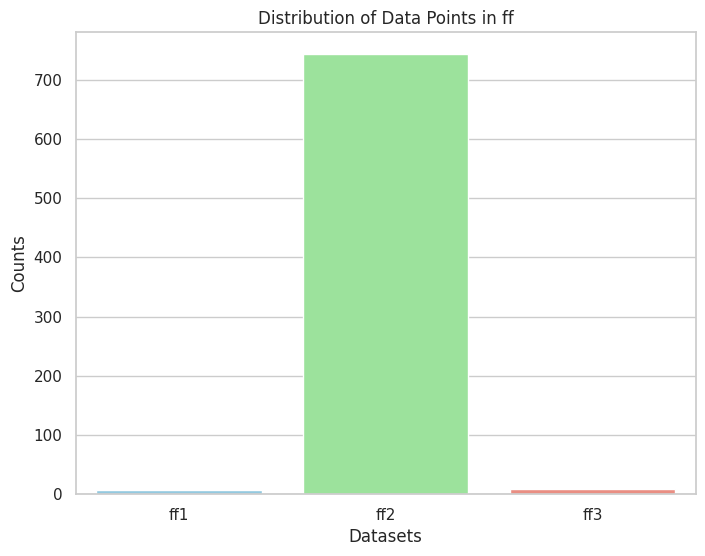

In [ ]:
counts = [len(ff1), len(ff2), len(ff3)]
labels = ['ff1', 'ff2', 'ff3']


data = pd.DataFrame({'dataset': np.repeat(labels, counts)})
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='dataset', data=data, palette=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Datasets')
plt.ylabel('Counts')
plt.title('Distribution of Data Points in ff')
plt.show()

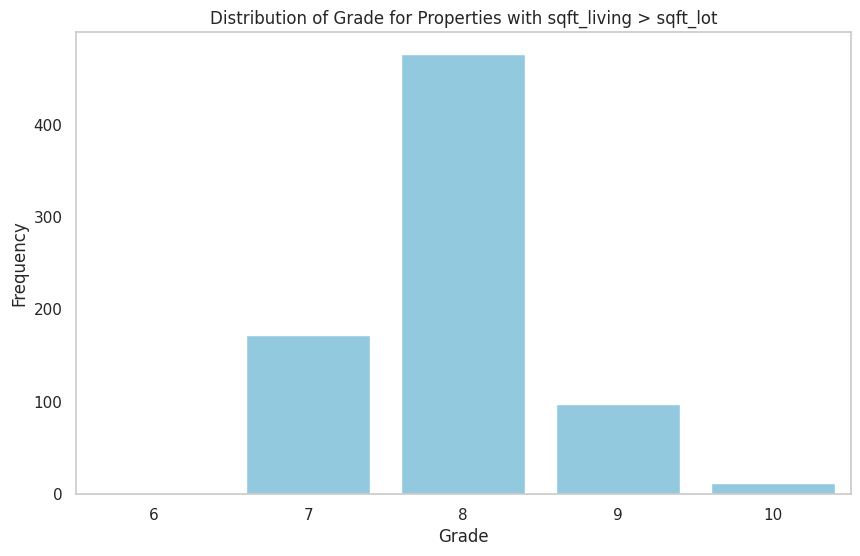

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ff, x='grade', color='skyblue')
plt.title('Distribution of Grade for Properties with sqft_living > sqft_lot')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

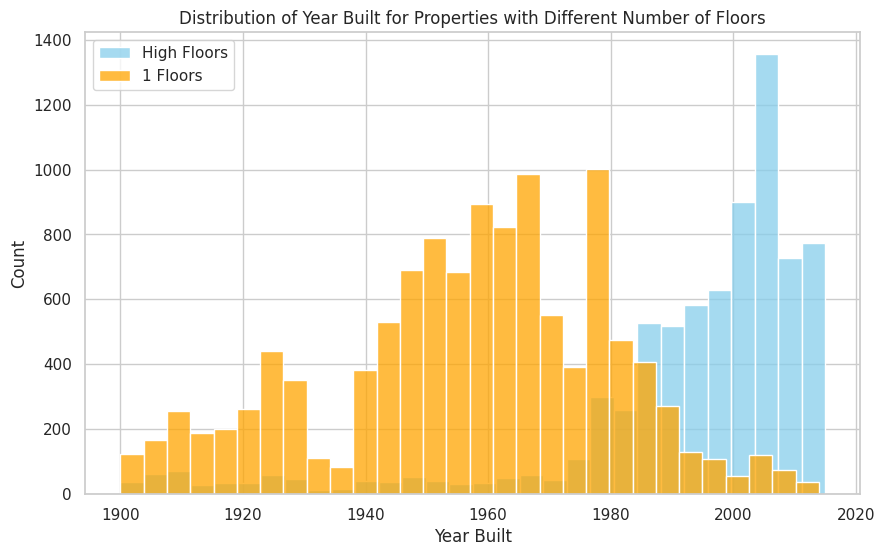

In [ ]:
plt.figure(figsize=(10, 6))


sns.histplot(df[df['floors'] > 1]['yr_built'], bins=30, kde=False, color='skyblue', label='High Floors')

sns.histplot(df[df['floors'] == 1]['yr_built'], bins=30, kde=False, color='orange', label='1 Floors')

plt.title('Distribution of Year Built for Properties with Different Number of Floors')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
df.drop(columns= 'price_category', inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19078 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19078 non-null  int64  
 1   date           19078 non-null  object 
 2   price          19078 non-null  float64
 3   bedrooms       19078 non-null  float64
 4   bathrooms      19078 non-null  float64
 5   sqft_living    19078 non-null  int64  
 6   sqft_lot       19078 non-null  int64  
 7   floors         19078 non-null  float64
 8   waterfront     19078 non-null  int64  
 9   view           19078 non-null  int64  
 10  condition      19078 non-null  int64  
 11  grade          19078 non-null  int64  
 12  sqft_above     19078 non-null  int64  
 13  sqft_basement  19078 non-null  int64  
 14  yr_built       19078 non-null  int64  
 15  yr_renovated   19078 non-null  int64  
 16  zipcode        19078 non-null  int64  
 17  lat            19078 non-null  float64
 18  long       

In [ ]:
df['sqft_per_bedroom'] = np.where(df['bedrooms'] != 0, df['sqft_living'] / df['bedrooms'], df['sqft_living'])

<Axes: xlabel='sqft_per_bedroom', ylabel='Count'>

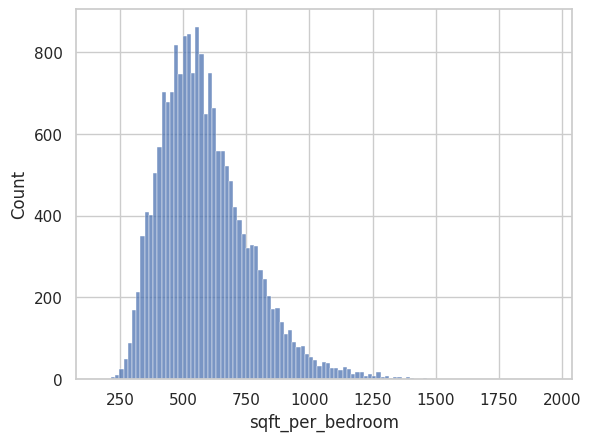

In [ ]:
sns.histplot(df['sqft_per_bedroom'])

In [ ]:
from scipy.stats import skew

In [ ]:
skew(df['sqft_per_bedroom'])

0.9879084131625511

In [ ]:
def sqft_per_bedrooms(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('zipcode'):
    q1 = subdf['sqft_per_bedroom'].quantile(0.25)
    q3 = subdf['sqft_per_bedroom'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    reduced_df = subdf[(subdf['sqft_per_bedroom'] >= lower_bound) & (subdf['sqft_per_bedroom'] <= upper_bound)]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out

In [ ]:
df=sqft_per_bedrooms(df)

In [ ]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [ ]:
skew(df['price_per_sqft'])

1.1295017772260652

<ipython-input-653-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

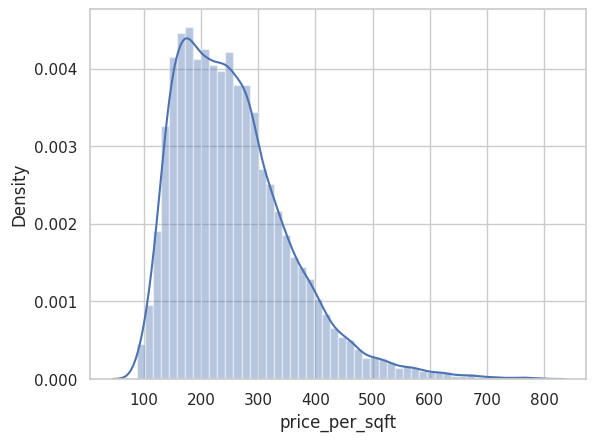

In [ ]:
sns.distplot(df['price_per_sqft'])

In [ ]:
def remove_outs_price_per_sqft(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('zipcode'):
        q1 = subdf['price_per_sqft'].quantile(0.25)
        q3 = subdf['price_per_sqft'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        reduced_df = subdf[(subdf['price_per_sqft'] >= lower_bound) & (subdf['price_per_sqft'] <= upper_bound)]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [ ]:
df=remove_outs_price_per_sqft(df)

In [ ]:
def scatter_plots_bhks(df, zipcode):
    plt.figure(figsize=(15, 10))
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'brown', 'pink', 'gray', 'olive', 'cyan','magenta', 'teal']
    unique_bedrooms = df['bedrooms'].unique()
    for i, num_bedrooms in enumerate(unique_bedrooms):
        data = df[(df.zipcode == zipcode) & (df.bedrooms == num_bedrooms)]
        plt.scatter(data.sqft_living, data.price, label=f'{num_bedrooms} Bedrooms', color=colors[i])
    plt.legend()
    plt.xlabel('Square Feet Living')
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of Price vs. Square Feet Living for Different Numbers of Bedrooms in Zipcode {zipcode}')
    plt.show()

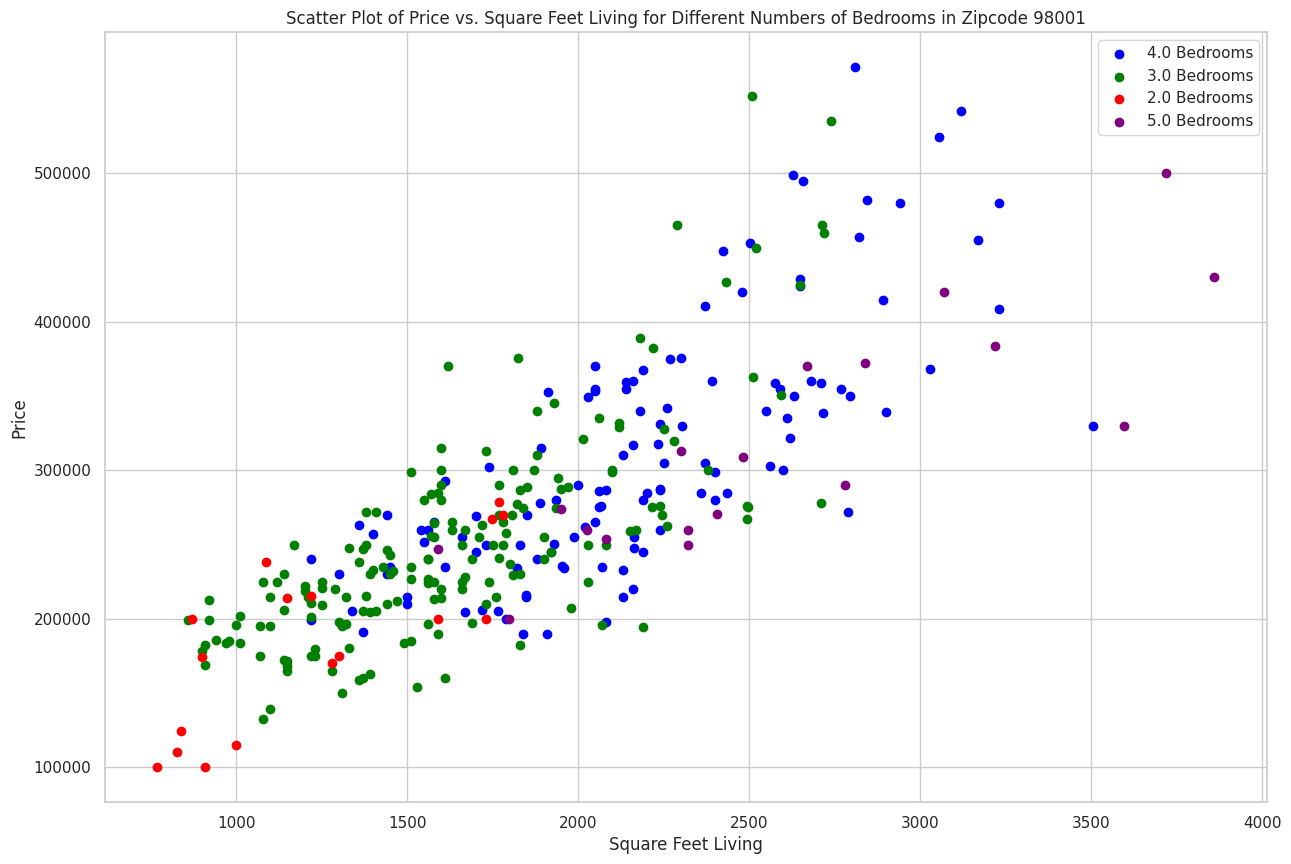

In [ ]:
scatter_plots_bhks(df,98001)

In [ ]:
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for zipcode, zipcode_df in df.groupby('zipcode'):
    bhk_stats={}
    for bhk,bhk_df in zipcode_df.groupby('bedrooms'):
      bhk_stats[bhk]={
          'mean': np.mean(bhk_df.price_per_sqft),
          'std' : np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
      for bhk,bhk_df in zipcode_df.groupby('bedrooms'):
        stats=bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<stats['mean']].index.values)
    return df.drop(exclude_indices,axis='index')

In [ ]:
df=remove_bhk_outliers(df)
df

id             date      price  bedrooms  bathrooms  \
0      7895500070  20150213T000000   240000.0       4.0        1.0   
3      4014400292  20150114T000000   465000.0       3.0        2.0   
4      1115450240  20141022T000000   360000.0       4.0        2.0   
5      3353400435  20140721T000000   230000.0       3.0        2.0   
6      9262800171  20150324T000000   252000.0       4.0        1.0   
...           ...              ...        ...       ...        ...   
18047  2770601912  20150402T000000   570000.0       3.0        3.0   
18048  1070000180  20141015T000000  1107460.0       4.0        3.0   
18049  7010700308  20141112T000000  1010800.0       4.0        3.0   
18050  2770601782  20140801T000000   453000.0       3.0        2.0   
18051  6821101731  20140930T000000   549000.0       3.0        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
0             1220      8075     1.0           0     0  ...            330   
3             2714     17936     2.0           0     0  ...              0   
4             2160      9528     2.0           0     0  ...              0   
5             1450     11204     1.0           0     0  ...              0   
6             1550     19800     1.0           0     0  ...            500   
...            ...       ...     ...         ...   ...  ...            ...   
18047         1550      1280     2.0           0     0  ...            330   
18048         3660      4760     2.0           0     0  ...            820   
18049         3610      4000     2.0           0     0  ...            970   
18050         1510      1618     2.0           0     0  ...            180   
18051         1230      1380     3.0           0     0  ...              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1969             0    98001  47.3341 -122.282           1290   
3          2005             0    98001  47.3185 -122.275           2590   
4          1992             0    98001  47.3341 -122.255           2280   
5          2003             0    98001  47.2639 -122.252           1520   
6          1969             0    98001  47.3117 -122.270           1640   
...         ...           ...      ...      ...      ...            ...   
18047      2013             0    98199  47.6493 -122.384           1550   
18048      2014             0    98199  47.6482 -122.409           3210   
18049      2007             0    98199  47.6580 -122.396           1980   
18050      2011             0    98199  47.6515 -122.384           1350   
18051      2013             0    98199  47.6521 -122.400           1760   

       sqft_lot15  sqft_per_bedroom  price_per_sqft  
0            7800        305.000000      196.721311  
3           18386        904.666667      171.333825  
4            9937        540.000000      166.666667  
5            9518        483.333333      158.620690  
6           22654        387.500000      162.580645  
...           ...               ...             ...  
18047        1579        516.666667      367.741935  
18048        4640        915.000000      302.584699  
18049        4000        902.500000      280.000000  
18050        1397        503.333333      300.000000  
18051        5664        410.000000      446.341463  

[17864 rows x 23 columns]

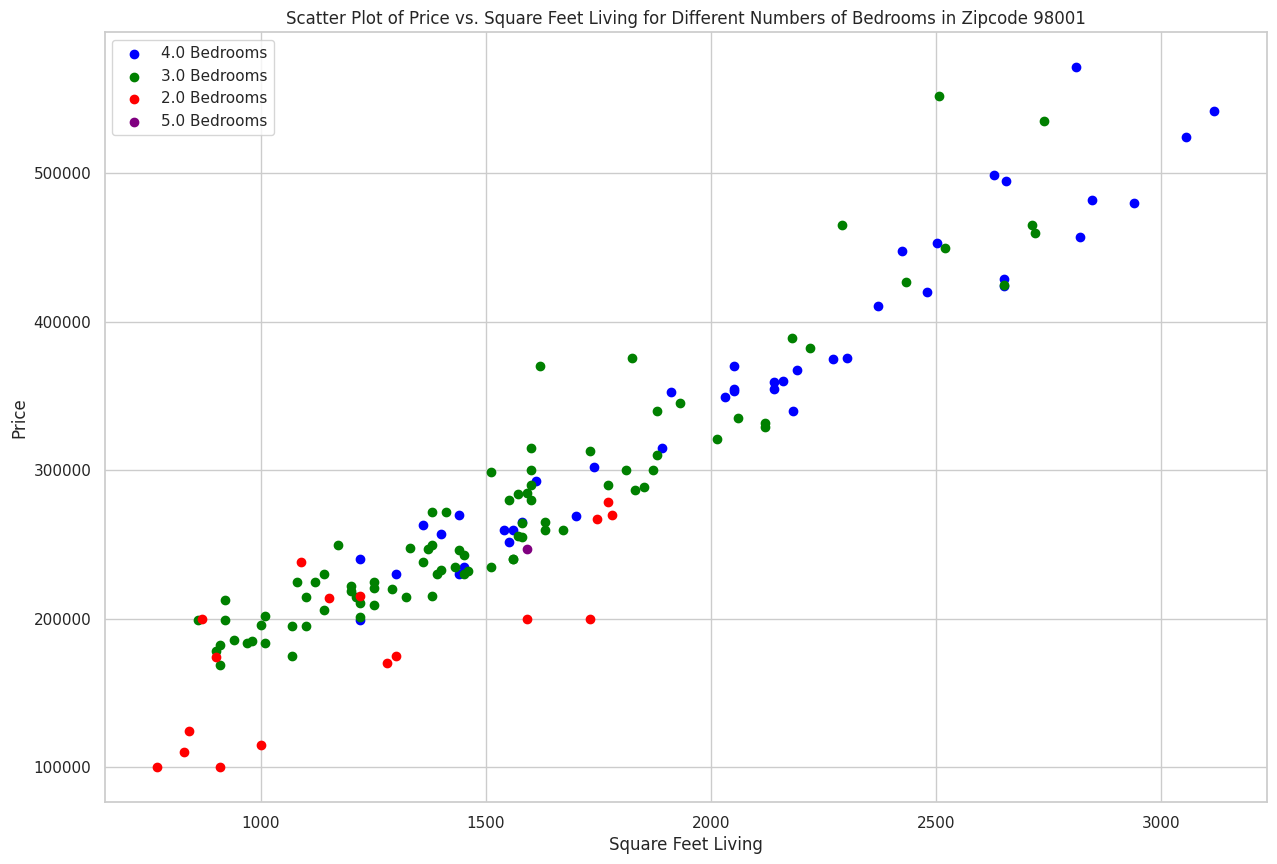

In [ ]:
scatter_plots_bhks(df,98001)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17864 entries, 0 to 18051
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                17864 non-null  int64  
 1   date              17864 non-null  object 
 2   price             17864 non-null  float64
 3   bedrooms          17864 non-null  float64
 4   bathrooms         17864 non-null  float64
 5   sqft_living       17864 non-null  int64  
 6   sqft_lot          17864 non-null  int64  
 7   floors            17864 non-null  float64
 8   waterfront        17864 non-null  int64  
 9   view              17864 non-null  int64  
 10  condition         17864 non-null  int64  
 11  grade             17864 non-null  int64  
 12  sqft_above        17864 non-null  int64  
 13  sqft_basement     17864 non-null  int64  
 14  yr_built          17864 non-null  int64  
 15  yr_renovated      17864 non-null  int64  
 16  zipcode           17864 non-null  int64  
 17

In [ ]:
dummies=pd.get_dummies(df.zipcode).astype(int)
dummies.columns

Index([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011,
       98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031,
       98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053,
       98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
       98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115,
       98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144,
       98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199],
      dtype='int64')

In [ ]:
df3= pd.concat([df,dummies.drop(98199,axis='columns')],axis='columns')
df3.columns

Index([              'id',             'date',            'price',
               'bedrooms',        'bathrooms',      'sqft_living',
               'sqft_lot',           'floors',       'waterfront',
                   'view',        'condition',            'grade',
             'sqft_above',    'sqft_basement',         'yr_built',
           'yr_renovated',          'zipcode',              'lat',
                   'long',    'sqft_living15',       'sqft_lot15',
       'sqft_per_bedroom',   'price_per_sqft',              98001,
                    98002,              98003,              98004,
                    98005,              98006,              98007,
                    98008,              98010,              98011,
                    98014,              98019,              98022,
                    98023,              98024,              98027,
                    98028,              98029,              98030,
                    98031,              98032,              98

In [ ]:
X=df3.drop(['id','zipcode','date','price','yr_built','yr_renovated','lat','long','sqft_per_bedroom','price_per_sqft'],axis='columns')
X.columns

Index([     'bedrooms',     'bathrooms',   'sqft_living',      'sqft_lot',
              'floors',    'waterfront',          'view',     'condition',
               'grade',    'sqft_above', 'sqft_basement', 'sqft_living15',
          'sqft_lot15',           98001,           98002,           98003,
                 98004,           98005,           98006,           98007,
                 98008,           98010,           98011,           98014,
                 98019,           98022,           98023,           98024,
                 98027,           98028,           98029,           98030,
                 98031,           98032,           98033,           98034,
                 98038,           98039,           98040,           98042,
                 98045,           98052,           98053,           98055,
                 98056,           98058,           98059,           98065,
                 98070,           98072,           98074,           98075,
                 98077,  

In [ ]:
y=df['price'].values
y

array([ 240000.,  465000.,  360000., ..., 1010800.,  453000.,  549000.])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
4536        4.0        2.0         2040      8996     1.0           0     0   
12438       3.0        1.0         2020      4800     1.0           0     0   
12366       4.0        2.0         1490      4054     1.0           0     0   
7534        3.0        2.0         1630      5996     2.0           0     0   
4159        4.0        2.0         2130      8400     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
14753       4.0        1.0         1970      5160     1.0           0     0   
15837       2.0        1.0         1340      1210     2.0           0     0   
10311       3.0        1.0         1500      7800     1.0           0     0   
5788        3.0        2.0         1980     13964     1.0           0     0   
14188       2.0        1.0          830      1276     2.0           0     0   

       condition  grade  sqft_above  ...  98144  98

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False], 'positive': [True]}
grid_search = GridSearchCV(regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'fit_intercept': True, 'positive': True}


In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print("R-squared score:", score)

R-squared score: 0.802207864244928


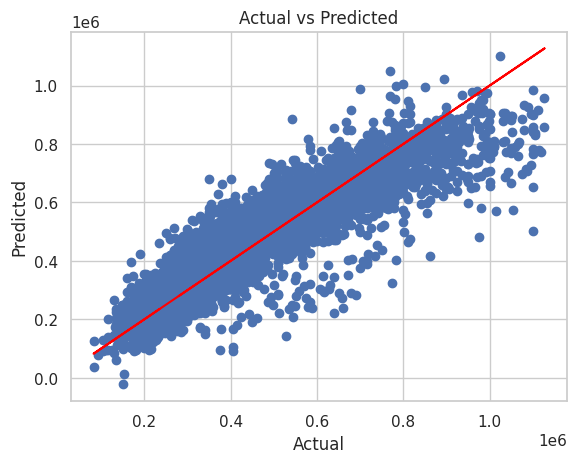

In [ ]:
from sklearn.model_selection import cross_val_score
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
print(y_pred)
print(y_test)

print("Coefficients:", best_model.coef_)
print("Intercept:", best_model.intercept_)

[239552.52690626 584615.62841375 678868.22697437 ... 184708.64419947
 290792.42131208 215326.85635735]
[279950. 728050. 850000. ... 230000. 280000. 235000.]
Coefficients: [0.00000000e+00 0.00000000e+00 1.03079125e+02 1.94385953e-01
 0.00000000e+00 2.45259253e+04 3.46200769e+04 2.99136034e+04
 4.17989356e+04 1.59493488e+01 0.00000000e+00 2.65773151e+01
 0.00000000e+00 9.55934021e+03 0.00000000e+00 0.00000000e+00
 4.62549526e+05 3.12723720e+05 2.37388911e+05 2.32641914e+05
 2.15106431e+05 3.97078251e+04 1.15428495e+05 8.08089645e+04
 6.92135787e+04 0.00000000e+00 0.00000000e+00 1.20869915e+05
 1.57988579e+05 1.01240131e+05 1.94756786e+05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.75895234e+05 1.54071208e+05
 0.00000000e+00 5.88505338e+05 4.03676064e+05 0.00000000e+00
 7.49844957e+04 2.17936372e+05 2.11031632e+05 1.28492490e+04
 6.70002375e+04 6.67124141e+03 5.94925477e+04 9.55844046e+04
 8.60019912e+04 1.34447977e+05 1.84291209e+05 1.90476830e+05
 1.38095583e+05 0.00000000e+00 3.902

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae= mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('Mae: ',mae)
print('Mse: ',mse)
print('Rmse: ',rmse)
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

Mae:  62266.864814935434
Mse:  7565546051.510611
Rmse:  86980.1474562478
0.802207864244928


In [ ]:
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)
print("Adjusted R-squared score:", adjusted_r2)

Adjusted R-squared score: 0.7991343461225259


In [ ]:
residuals=y_test-y_pred
print(residuals)

[ 40397.47309374 143434.37158625 171131.77302563 ...  45291.35580053
 -10792.42131208  19673.14364265]


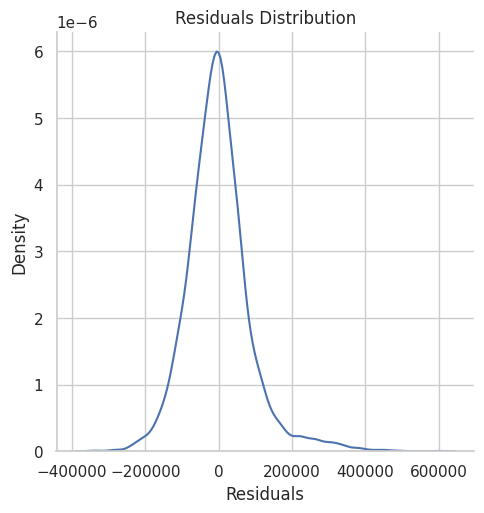

In [ ]:
sns.displot(residuals,kind='kde')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals Distribution')
plt.show()

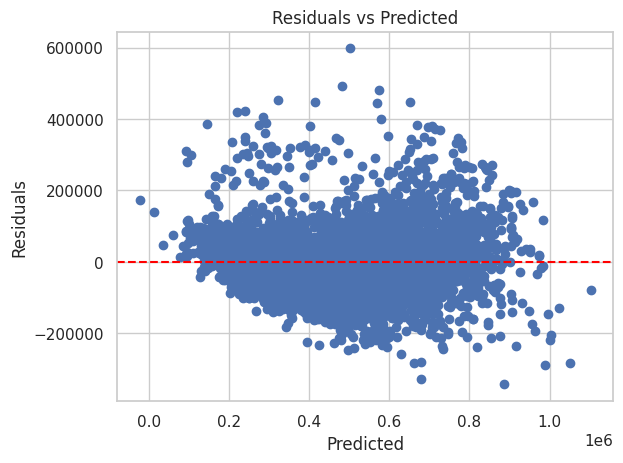

In [ ]:
plt.scatter(y_pred,residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [ ]:
input_data = np.array([3,1,1200,5650,1,0,0,3,7,1000,0,98178,1340,5650]).reshape(1, -1)

In [ ]:
def predict_price(zipcode, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, sqft_living15, sqft_lot15 ):
  zip_index=np.where(X.columns==zipcode)[0][0]

  x=np.zeros(len(X.columns))
  x[0]=bedrooms
  x[1]=bathrooms
  x[2]=sqft_living
  x[3]=sqft_lot
  x[4]=floors
  x[5]=waterfront
  x[6]=view
  x[7]=condition
  x[8]=grade
  x[9]=sqft_above
  x[10]=sqft_basement
  x[11]=sqft_living15
  x[12]=sqft_lot15

  if zip_index >= 1:
    x[zip_index]=1
  return best_model.predict([x])[0]


In [ ]:
predict_price(98178,3,1,1180,5650,1,0,0,3,7,1180,0,1340,5650)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


206136.5606998388

In [ ]:
predict_price(98178, 3, 1, 1200, 8000, 2, 1, 1, 3, 7, 1000, 200, 1340, 5650 )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


264930.06960906065

In [ ]:
predict_price(98125,3,2,2570,7242,2,0,0,3,7,2170,400,1690,7639)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


523956.0800273912

In [ ]:
predict_price(98125,1,1,500,300,2,0,1,3,6,500,0,800,900)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


251764.7825654964

In [ ]:
filtered_properties = df[
    (df['waterfront'] == 1) &
    (df['grade'] >= 8) &
    (df['view'] >= 2)
]
filtered_properties

id             date     price  bedrooms  bathrooms  \
9079   2122039094  20141126T000000  705000.0       3.0        3.0   
9085   2322029048  20141119T000000  999000.0       3.0        2.0   
9104   5215200010  20140626T000000  663000.0       3.0        2.0   
9142   1822039138  20150227T000000  600000.0       2.0        2.0   
9153   7558800620  20140822T000000  600000.0       2.0        1.0   
9165   5215200050  20140729T000000  750000.0       3.0        2.0   
13590  7129303045  20150417T000000  949950.0       5.0        2.0   
13726  7129303070  20140820T000000  735000.0       4.0        2.0   
16030  6329000190  20140729T000000  750000.0       4.0        1.0   
16041  6329000185  20150329T000000  540000.0       3.0        2.0   
16703  6102400166  20140905T000000  649000.0       3.0        2.0   
16705  7631200085  20140512T000000  947500.0       3.0        2.0   
16762  7631800110  20140918T000000  380000.0       3.0        2.0   
17342  7567600030  20150127T000000  750000.0       5.0        1.0   
17676  3222049055  20150116T000000  650000.0       3.0        1.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
9079          1970     20978     2.0           1     3  ...            200   
9085          2830    505166     1.0           1     3  ...           1000   
9104          2480     37843     1.0           1     3  ...              0   
9142          2320     18919     2.0           1     4  ...              0   
9153          1550      7764     1.0           1     4  ...              0   
9165          2960     69351     2.0           1     3  ...              0   
13590         2340      1989     2.0           1     4  ...              0   
13726         3040      2415     2.0           1     4  ...              0   
16030         2520     21834     1.0           1     4  ...           1100   
16041         2600     23361     1.0           1     4  ...            450   
16703         1810     17006     2.0           1     4  ...              0   
16705         2980     27144     1.0           1     2  ...            800   
16762         1980     17342     2.0           1     4  ...            400   
17342         2640     13290     1.0           1     4  ...           1240   
17676         2800     19386     1.0           1     4  ...           1400   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
9079       1980             0    98070  47.3844 -122.438           2280   
9085       1962             0    98070  47.3782 -122.514           2120   
9104       1974             0    98070  47.4003 -122.422           2350   
9142       1976             0    98070  47.3905 -122.462           1610   
9153       1965          1986    98070  47.3580 -122.446           1690   
9165       1990             0    98070  47.4000 -122.420           2350   
13590      1959             0    98118  47.5193 -122.257           2200   
13726      1966             0    98118  47.5188 -122.256           2620   
16030      1960             0    98146  47.4996 -122.378           1700   
16041      1912             0    98146  47.4997 -122.379           1700   
16703      1913          1987    98166  47.4663 -122.369           2180   
16705      1917             0    98166  47.4522 -122.378           1890   
16762      1984             0    98166  47.4551 -122.373           2060   
17342      1954             0    98178  47.5022 -122.223           2400   
17676      1965             0    98198  47.3554 -122.324           3270   

       sqft_lot15  sqft_per_bedroom  price_per_sqft  
9079        75396        656.666667      357.868020  
9085        21988        943.333333      353.003534  
9104        42122        826.666667      267.338710  
9142        18919       1160.000000      258.620690  
9153        11620        775.000000      387.096774  
9165        41433        986.666667      253.378378  
13590        3230        468.000000      405.961538  
13726        2433        760

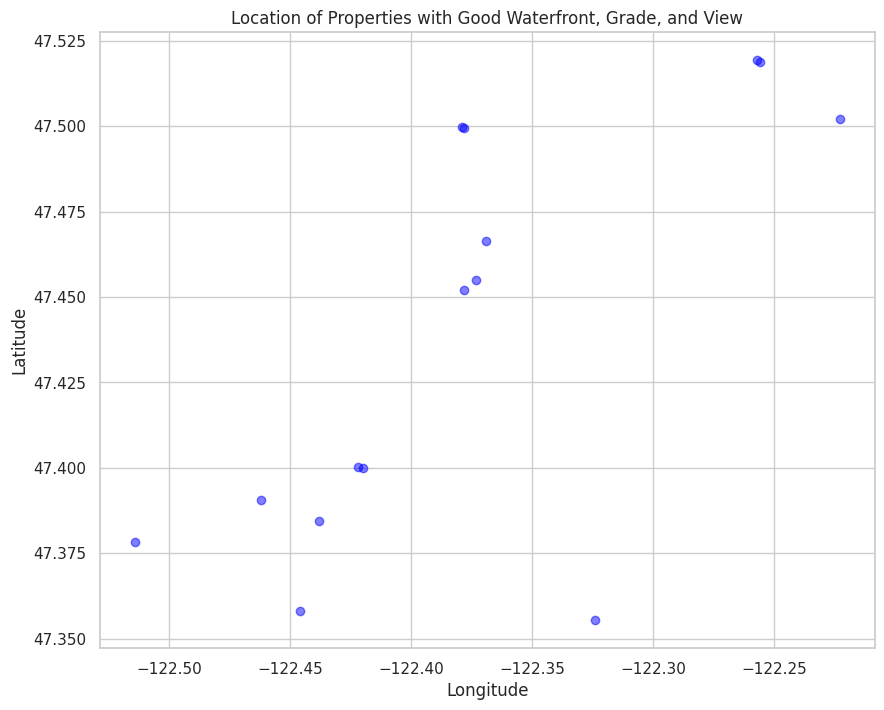

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(filtered_properties['long'], filtered_properties['lat'], alpha=0.5, c='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location of Properties with Good Waterfront, Grade, and View')
plt.grid(True)
plt.show()


We are filtering out properties with good waterfront, grade and view from our dataset. We observe that all these properties are almost in the same area.(on the basis of the latitudes and longitudes)

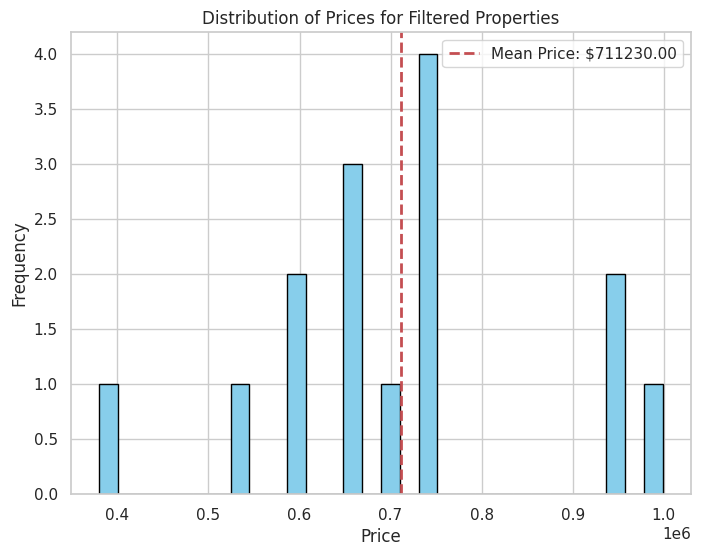

In [ ]:
mean_price = filtered_properties['price'].mean()

plt.figure(figsize=(8, 6))
plt.hist(filtered_properties['price'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(mean_price, color='r', linestyle='--', linewidth=2, label=f'Mean Price: ${mean_price:.2f}')
plt.title('Distribution of Prices for Filtered Properties')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

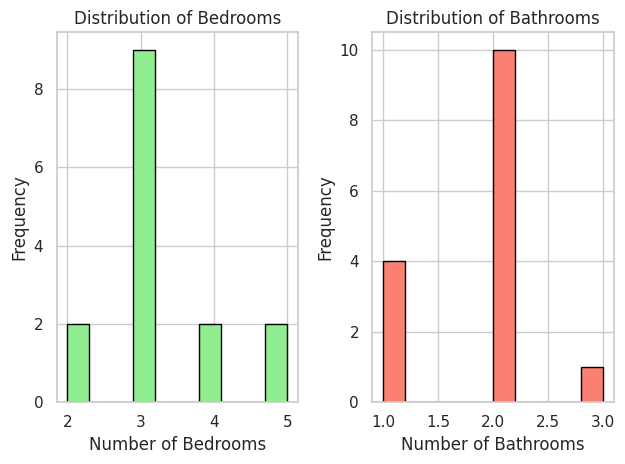

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(filtered_properties['bedrooms'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')


plt.subplot(1, 2, 2)
plt.hist(filtered_properties['bathrooms'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()